# **TOCCSL data analysis**

Data should be stuctured into subfolders:
- **profile**: containing recorded images of laser profile
- **TOCCSL**: conataining recorded TOCCSL sequences
- **sm**: containing single molecule sequences

In [1]:
from TOCCSL import *
%matplotlib widget

In [2]:
# Sets data path to the folder in which the analysis will take place
data_path = 'C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/{}'

In [3]:
# Sets the folder in which the results will be saved in
results_path = 'C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/FinalResults/{}' 

In [4]:
import os
if not os.path.exists(results_path[:-3]):
    os.makedirs(results_path[:-3])

## <u> **Data correction**

This part determines the laser profile using the measurements in the recovery frame (second frame) of the TOCCSL measurements in the folder 'TOCCSL' within the data path, and with the measurements using arbitrary captures, e.g. of a dummy probe, in the folder 'profile' within the data path. Plots are given to allow for comparison.

In the end you can choose which profile to continue with.

C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL\divSav_AF647_att008_till5ms_delaymacro10ms_rot_001_.SPE.
  warnings.warn("Number of frames according to file header "
C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL\divSav_AF647_att008_till5ms_delaymacro10ms_rot_002_.SPE.
  warnings.warn("Number of frames according to file header "
C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL\divSav_AF647_att008_till5ms_delaymacro10ms_rot_003_.SPE.
  warnings.warn("Number of frames according to file head

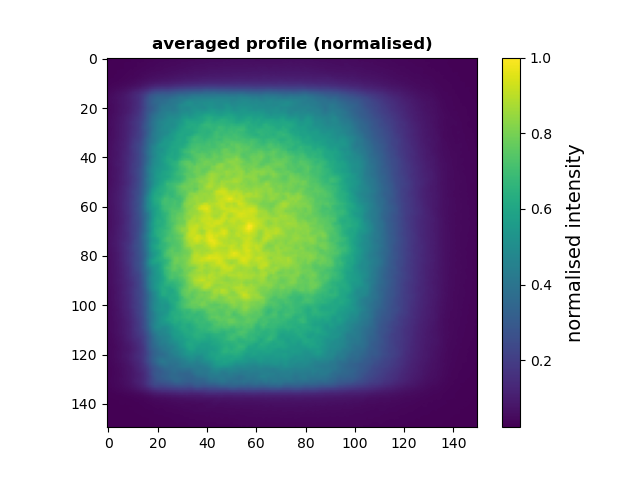

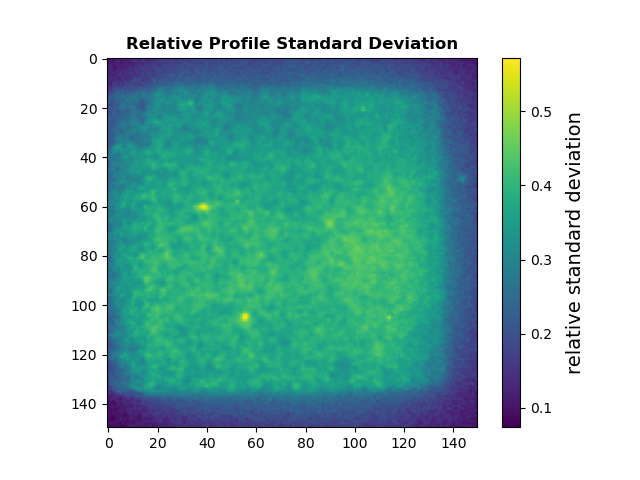

In [5]:
profile_path = data_path.format('TOCCSL\\{}')
filename = getfilenames(folder=data_path.format('TOCCSL'))

profile_im_toccsl, profile_file_toccsl = get_mean_profile(filename, profile_path, profile_frame=1)
profile_std_toccsl, profile_std_file_toccsl = get_std_profile(filename, profile_path, profile_frame=1)

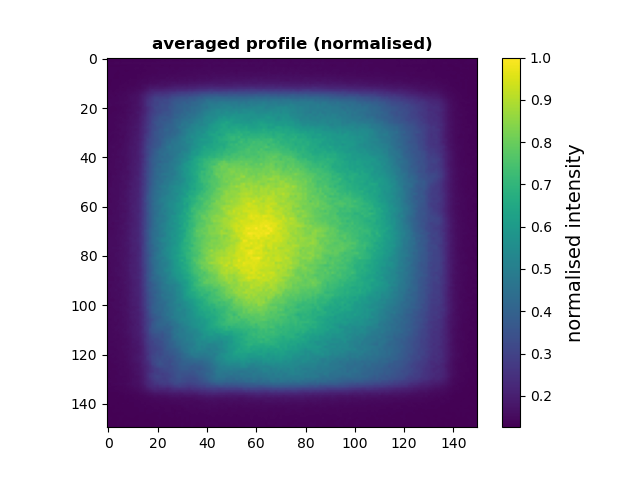

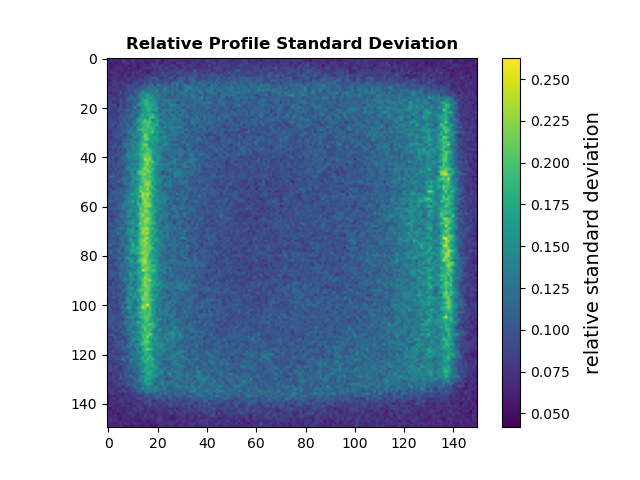

In [6]:
profile_path = data_path.format('profile\\{}')
filename = getfilenames(folder=data_path.format('profile'))

profile_im, profile_file = get_mean_profile(filename, profile_path)
profile_std, profile_std_file = get_std_profile(filename, profile_path)

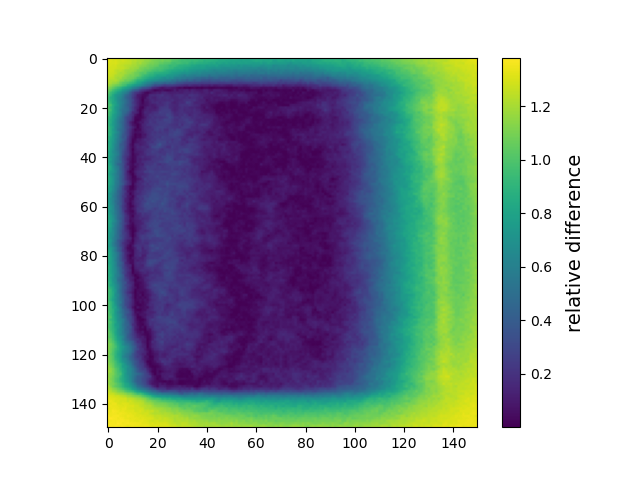

In [7]:
fig, ax = plt.subplots()
profile_difference = np.abs(profile_im_toccsl/np.max(profile_im_toccsl) - profile_im/np.max(profile_im))
im = ax.imshow(profile_difference/(profile_im/(2*np.max(profile_im))+profile_im_toccsl/(2*np.max(profile_im_toccsl))))
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05)
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('relative difference', fontsize=14, loc='center', labelpad=10)

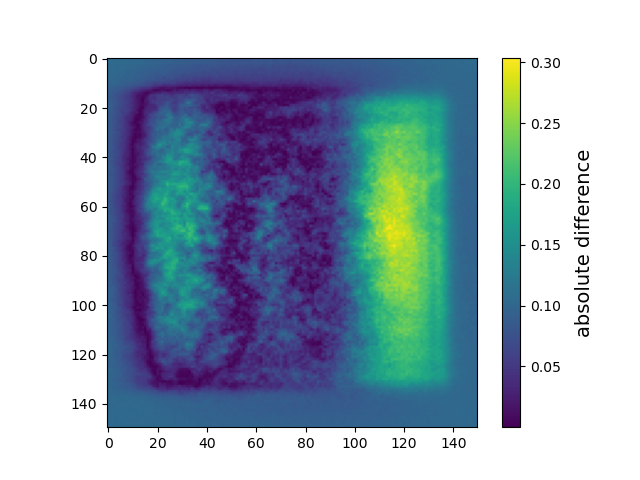

In [8]:
fig, ax = plt.subplots()
profile_difference = np.abs(profile_im_toccsl/np.max(profile_im_toccsl) - profile_im/np.max(profile_im))
im = ax.imshow(profile_difference)
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05)
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('absolute difference', fontsize=14, loc='center', labelpad=10)

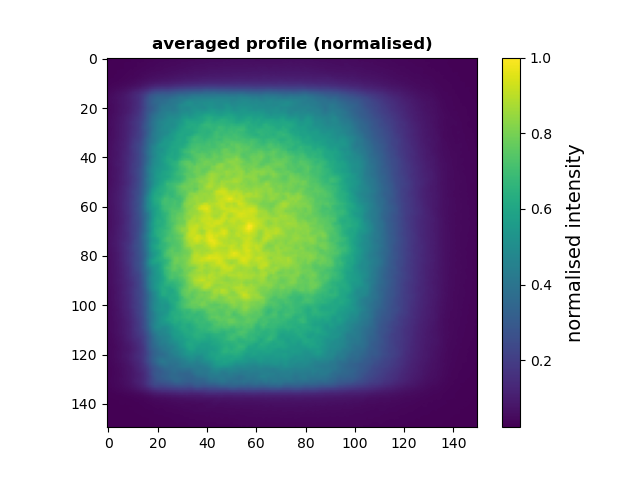

In [9]:
### Choose which profile to use
### Enter 'TOCCSL' for TOCCSL measurements 'profile' for the other measurements
### You can also enter an arbitrary folder name with measurements in it
### Be sure to adjust the profile frame for the correct value (0 for profile, 1 for TOCCSL)
profile_folder_name = 'TOCCSL'
profile_frame = 1


profile_path = data_path.format(profile_folder_name+'\\{}')
filename = getfilenames(folder=data_path.format(profile_folder_name))

profile_im, profile_file = get_mean_profile(filename, profile_path, profile_frame=profile_frame) # Change profile_frame depending on recovery frame/dummy probe

### **Perform data correction**

Run these two cells

In [12]:
toccsl_files = getfiles(folder=data_path.format('TOCCSL'), extension='SPE')

sm_files = getfiles(folder=data_path.format('sm'), extension='SPE')
sm_folder = data_path.format('sm')

In [13]:
#### Sort the data
toccsl_files.sort()
sm_files.sort()

The raw data correction is done for the TOCCSL measurements in the TOCCSL folder, and the single molecule measurements in the sm folder.

Everything is corrected with the laser profile. mask_bool sets wether bright areas are masked, mask_num from which frame, mask_edges wether only edges should be masked, thresh the masking threshold (details can be found in the correct_data function in laserprofile.py.

Only run the 'Save corrected data' cell if you have just performed the correction for both TOCCSL and sm results.

Pick up from ROI selection if no data correction is being done now.

In [13]:
##### set True, if high density areas should be masked out
mask_bool = True
##### set start frame for masking high density areas
mask_num = 5

mask_edges = True

thresh = 10000

mask_toccsl_bool, smoothed_toccsl = correct_data(toccsl_files, profile_file, mask_num=mask_num, mask_bool=mask_bool, thresh=thresh, mask_edges=mask_edges)

Files:   0%|          | 0/80 [00:00<?, ?it/s]

C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL/dvTOCCSL_AF647_att0.093_till5ms_trec4.5s_tbleach4s_rot_rot_001_.SPE.
  warnings.warn("Number of frames according to file header "


KeyboardInterrupt: 

In [ ]:
##### set True, if high density areas should be masked out
mask_bool = True #False
##### set start frame for masking high density areas
mask_num = 0 #None

mask_edges = True #False

thresh=10000

mask_sm_bool, smoothed_sm = correct_data(sm_files, profile_file, mask_num=mask_num, mask_bool = mask_bool, thresh=thresh, mask_edges=mask_edges)

### **Save corrected data**

In [ ]:
### Only run if you have just completed the data correction.

In [15]:
with open(data_path.format('TOCCSL\\corrected.txt'), 'wb') as f: 
    pickle.dump([mask_toccsl_bool, smoothed_toccsl, mask_sm_bool, smoothed_sm], f)

## <u> **ROI selection**

In [14]:
# Remnant, ignore
corr_folder = 'corrected'

### **setting parameters**

In [15]:
##### set frame number of pre-bleach image and first recovery image; First frame is frame 0
pre_bleach_frame = 1
rec_frame = 5
##### set camera pixel size
px_size = 0.16 #µm

### You might notice some of the parameters to repeat themselves throughout the code.
### This is done for convenience, for on-the-fly adjustments

### **Localization of single molecules**
Needed to determine densities (in first recovery frame) for ROIs

Run below cell to start the locator GUI. Skip if not wished now

In [15]:
!python -m sdt.gui.locator

C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
C:\Users\mrdxy\anaconda3\lib\runpy.py:127: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Exception ignored in: <function Pool.__del__ at 0x0000026CC9892AF0>
Traceback (most recent call last):
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\pool.py", line 268, in __del__
  File "C:\Users\mrdxy\anaconda3\lib\multiprocessing\queues.py", l

### **Fit profile and create ROI objects**

This section helps in choosing the ROI which will be needed in the later analysis. A plot of the profile as well as the intensity cross sections along both axes through the center are provided

In [16]:
# If True, the Area center is taken as the ROI center, if False the intensity fit maximum
central_center = True
# If central_center=True; threshold which the intensity outside the ROI shall not pass
aperture_thresh = 0.15

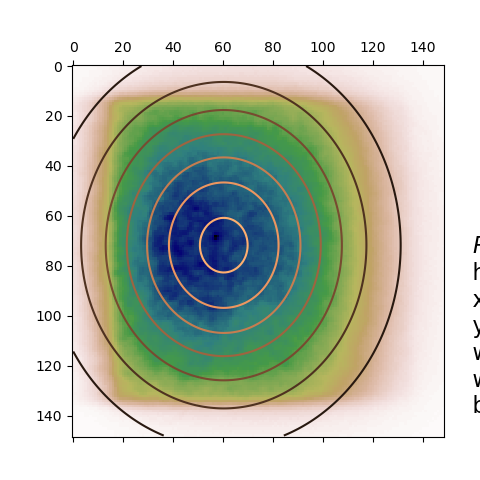

In [17]:
roi_coordinates = crop(profile_im)
r = roi.ROI(roi_coordinates[0], roi_coordinates[1])
crop_roi = r
profile_im_cropped = r(profile_im) # Commented out by Max
#profile_im_cropped = profile_im # Added by Max

fit_rel = get_fit_mask(profile_im_cropped, profile_path, profile_file.split('\\')[-1], fig_show=False)
fit_parameters = fitgaussian(profile_im_cropped)
    
area_cropped = np.shape(profile_im_cropped)[0] * np.shape(profile_im_cropped)[1] * px_size**2

In [18]:
# Getting center of the gaussian profile fit
# Be very careful with the indices!!! Can be confusing.
x_center = fit_parameters[2]
y_center = fit_parameters[1]
x_sigma = fit_parameters[4]
y_sigma = fit_parameters[3]
roi_center = (x_center, y_center)
print('The center is at x:', x_center, 'y:', y_center, 'with widths x:', x_sigma, 'y:', y_sigma)

The center is at x: 60.290399839294565 y: 71.74738334673826 with widths x: 35.584135522227896 y: 40.71717677562665


In [19]:
size_x, size_y = profile_im.shape

In [20]:
normalized_profile = np.array(profile_im_cropped)/np.max(np.array(profile_im_cropped))
normalized_profile = ndimage.gaussian_filter(normalized_profile, 4)

In [21]:
# Getting size of the aperture

profile_im_temp = profile_im_cropped/np.max(profile_im_cropped)

one_side_reached = False
for i in range(profile_im_cropped.shape[0]):
    if one_side_reached:
        if max(profile_im_temp[i,:])>aperture_thresh:
            border_down = i
    else:
        if max(profile_im_temp[i,:])>aperture_thresh:
            border_up = i
            one_side_reached = True
one_side_reached = False
for i in range(profile_im_cropped.shape[1]):
    if one_side_reached:
        if max(profile_im_temp[:,i])>aperture_thresh:
            border_right = i
    else:
        if max(profile_im_temp[:,i])>aperture_thresh:
            border_left = i
            one_side_reached = True

In [22]:
if central_center:
    x_center = border_left+(border_right-border_left)/2; y_center = border_up+(border_down-border_up)/2
    roi_center = (x_center, y_center)

In [23]:
print('ROI Center:', roi_center)

ROI Center: (66.5, 73.0)


In [24]:
print(f'The area with an intensity larger than {aperture_thresh*100}% of the maximum is {round((border_right-border_left)*px_size, 3)}x{round((border_down-border_up)*px_size, 3)} mum^2')

The area with an intensity larger than 15.0% of the maximum is 19.04x19.84 mum^2


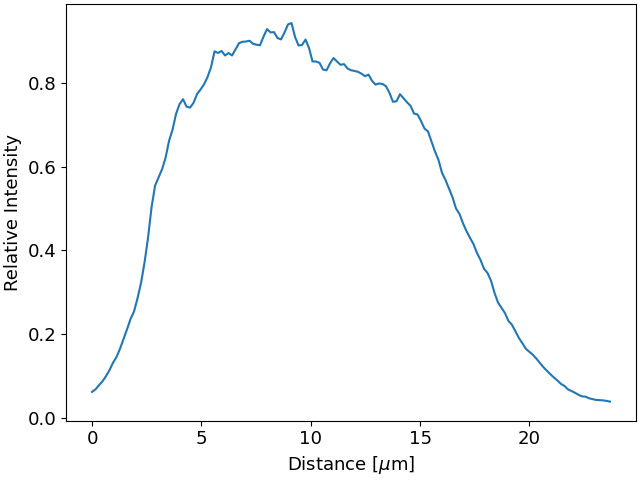

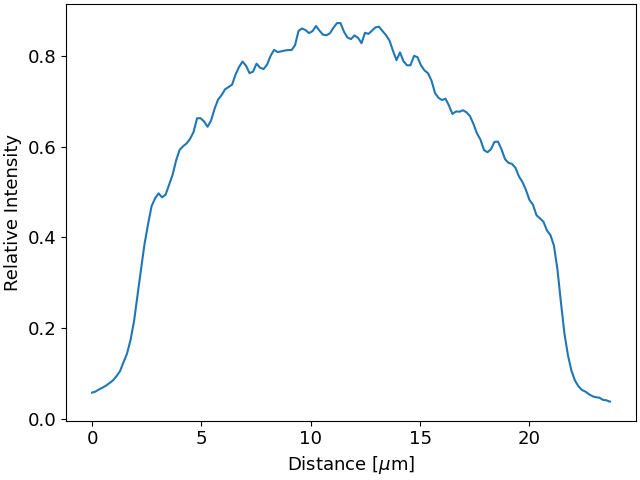

In [25]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(px_size*np.arange(size_y-1), profile_im_temp[int(round(border_up+border_down/2)),:])
ax.set_xlabel('Distance [$\mu$m]')
ax.set_ylabel('Relative Intensity')
plt.rcParams.update({'font.size': 10})
fig.savefig(results_path.format('Rel_profile_xaxis'))
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(px_size*np.arange(size_x-1), profile_im_temp[:,int(round(border_left+border_right/2))])
ax.set_xlabel('Distance [$\mu$m]')
ax.set_ylabel('Relative Intensity')
plt.rcParams.update({'font.size': 10})
fig.savefig(results_path.format('Rel_profile_yaxis'))

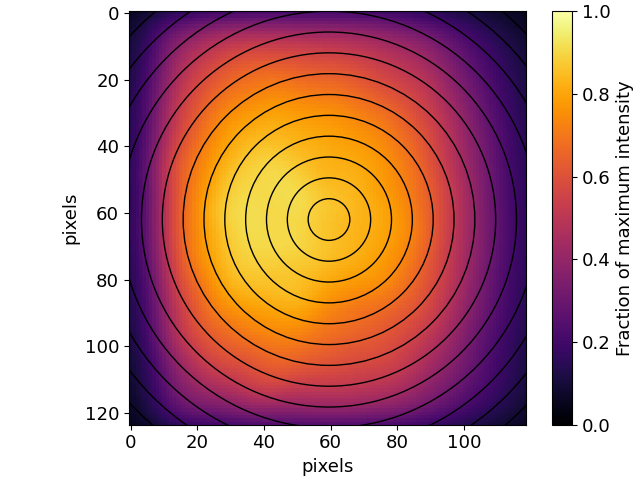

In [26]:
from matplotlib.patches import Circle, Rectangle

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(normalized_profile[border_up:border_down,border_left:border_right], vmin=0, vmax=1, cmap= 'inferno')
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05, label='Fraction of maximum intensity')
ax.set_xlabel('pixels')
ax.set_ylabel('pixels')
fig.savefig(results_path.format('profile'), dpi=150)

for i in range(1, 15):
    temp_circle = Circle((x_center-border_left, y_center-border_up), radius=i/px_size, fill=False)
    ax.add_patch(temp_circle)

#rectangle = Rectangle((border_left, border_up), border_right-border_left, border_down-border_up, fill=False, color='g')
#ax.add_patch(rectangle)
fig.savefig(results_path.format('profile_with_aperture'), dpi=150)
plt.rcParams.update({'font.size': 10})

### **Pre-bleach density sorting**
- group files with similar density values together
- use normalised standard deviation as threshold $$\frac{std(data_{group})}{<data_{group}>} < threshold$$

This part I did not use, it is left over from Marinas template. It is intended to group measurements according to the brightness of the pre-bleach frame of the TOCCSL sequence and may be incorportated for use if wished, I set thresh=1 as this way I get only one group. Below cells should still be run for the following code to work.

#### **Settings**

In [27]:
######## set density sorting threshold: allowed normalised standard deviation of a group
thresh = 1

px_size = 0.16 #[µm]
pre_bleach_frame = 1

#### **Perform sorting**

In [28]:
#### **Evaluate pre-bleach intensities in central ROI (level set to 0.6)**
int_sorting_ROI = make_ROI(fit_rel, chosen_value=0.6,fig_show=False)[0]

intensities = {}
intensities_sem = {}

for f in toccsl_files:
    with pims.open(f) as seq:
        img = seq[pre_bleach_frame]
        intensities[f.split('/')[-1]] = np.nanmean(int_sorting_ROI(img, fill_value=np.nan))
        intensities_sem[f.split('/')[-1]] = np.nanstd(np.array(img))/np.sqrt(int_sorting_ROI.area)

## Creating index to plot better later on # Max
intensities_unsorted = intensities # Max
intensities_index = {} # Max
ind = 1 # Max
for key in intensities.keys(): # Max
    intensities_index[key] = ind # Max
    ind += 1 # Max

### **Group files with similar pre-blech densities**
intensities = {k: v for k, v in sorted(intensities.items(), key=lambda item: item[1])}
intensities_sem = {k: intensities_sem[k] for k in intensities.keys()}

d = list(intensities.values())
derr = list(intensities_sem.values())

std_n_l = []

################# group density values
groups = []
groups_err = []

start = 0
while start < len(d)-2:
    for i in range(start+2,len(d)+1):

        if len(d[start:i]) > 1:
            group = d[start:i]

            std_n = np.std(group)/np.mean(group)


            if std_n > thresh and len(group) > 2:
                i -= 1
                group = d[start:i]
                group_err = derr[start:i]
                std_n = np.std(group)/np.mean(group)
                std_n_l.append(std_n)

                start = i
                groups.append(group)
                groups_err.append(group_err)
                break


            elif std_n > thresh and len(group) <= 2:
                start = i
                break

            elif std_n < thresh and len(group) >= 2 and i==len(d):
                group = d[start:i]
                group_err = derr[start:i]
                std_n = np.std(group)/np.mean(group)
                std_n_l.append(std_n)

                start = i

                groups.append(group)
                groups_err.append(group_err)
                break

########### plot and combine to list of dictionaries

#fig, ax = plt.subplots(1,2, figsize=(15,5))

groups_files = []
groups_dicts = {}

s=0
c=0
for g in groups:
    x = np.linspace(s,s+len(g),len(g))
    x = [] # Max
    y = [] # Max
    for val in g: # Max
        x.append(list(intensities_unsorted.values()).index(val) + 1) # Max
        y.append(val) # Max
    #ax[0].plot(x, y, 'o');
    #ax[1].hist(g);
    ids = list(intensities.keys())[s:s+len(g)]
    groups_files.append(ids)
    groups_dicts['g{}'.format(c+1)] = dict(zip(groups_files[c], groups[c]))
    
    c += 1
    s += len(g)
    
"""
fig.suptitle('grouped intensities', weight='bold')
ax[0].legend(['g{}'.format(i+1) for i in range(len(groups))]);
ax[1].legend(['g{}'.format(i+1) for i in range(len(groups))]);

ax[0].set_xlabel('files')
ax[0].set_xticklabels([])
ax[0].set_ylabel('intensity [counts]')

ax[1].set_xlabel('intensity [counts]')

fig.savefig(results_path.format('000_sorted_densities.png'))
"""

C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL/divSav_AF647_att008_till5ms_delaymacro10ms_rot_001_.SPE.
  warnings.warn("Number of frames according to file header "
C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL/divSav_AF647_att008_till5ms_delaymacro10ms_rot_002_.SPE.
  warnings.warn("Number of frames according to file header "
C:\Users\mrdxy\anaconda3\lib\site-packages\pims\spe_stack.py:196: UserWarning: Number of frames according to file header does not match the size of file C:/Users/mrdxy/Documents/Analysis_Master_Thesis/analysis/TOCCSL/divSav_AF647_att008_till5ms_delaymacro10ms_rot_003_.SPE.
  warnings.warn("Number of frames according to file head

"\nfig.suptitle('grouped intensities', weight='bold')\nax[0].legend(['g{}'.format(i+1) for i in range(len(groups))]);\nax[1].legend(['g{}'.format(i+1) for i in range(len(groups))]);\n\nax[0].set_xlabel('files')\nax[0].set_xticklabels([])\nax[0].set_ylabel('intensity [counts]')\n\nax[1].set_xlabel('intensity [counts]')\n\nfig.savefig(results_path.format('000_sorted_densities.png'))\n"

## **Determine optimal ROI**

### **Looking at dependence for Tracking Measurements**

The following can be used as a tool to optimize the size of the ROI taken in later analyses. It generates plots that show the particle density registered in the tracking and TOCCSL measurements.

If this is not of interest, you can skip to Single molecule and TOCCSL data filtering

### **setting parameters**

In [29]:
##### set frame number of recovery image
rec_frame = 5
##### set frame number of first tracking image
track_beg_frame = 0
##### set camera pixel size
px_size = 0.16 #µm

In [30]:
min_roi_r = 1.0 # lower distance from roi center for which the particle density is plotted in micrometers
max_roi_r = 10.0 # upper distance from roi center for which the particle density is plotted in micrometers
roi_r_step = 0.5 # step between two distances from the center, the anulus over which is averaged is 2*roi_r_step micrometers thick
levels = np.linspace(min_roi_r, max_roi_r, int((max_roi_r-min_roi_r)/roi_r_step + 1))
rois_to_evaluate = np.linspace(min_roi_r-roi_r_step, max_roi_r+roi_r_step, int((max_roi_r-min_roi_r)/roi_r_step + 3))
density = np.zeros(len(levels))
mean_densities = []

rois = [roi.EllipseROI((x_center, y_center), (r/px_size, r/px_size)) for r in rois_to_evaluate]

areas_pixels = [r.area for r in rois]
areas = [r.area*(px_size**2) for r in rois]
radii_circ = [np.sqrt(a/np.pi) for a in areas]

#### **Calculating mean densities for each ROI level (Tracking)**

In [31]:
f = getfiles(folder=data_path.format(f'sm\{corr_folder}'), extension='h5')
roi_folder=data_path.format(f'sm\{corr_folder}')
num_file = len(f)

In [32]:
######## calculating mean densities for each ROI level
#looping through all files
overall_density = 0
for ff,i in zip(tqdm(f, desc='Files'),range(num_file)):
    cur = io.load(ff)
    
    overall_density += len(rois[-1](cur)[rois[-1](cur)['frame'] == track_beg_frame])/areas[-1]
    
    #looping through all levels/ rois
    for j in range(1, len(rois_to_evaluate)-1):
        cur_sel_prev = rois[j-1](cur)
        cur_sel_next = rois[j+1](cur)
        molecule_num = len(cur_sel_next[cur_sel_next['frame'] == track_beg_frame]) - len(cur_sel_prev[cur_sel_prev['frame'] == track_beg_frame])
        density[j-1] += molecule_num/(areas[j+1]-areas[j-1])
        
    if (i % 5) == 0 and i!= 0:
        mean_densities.append(density/i)
density = density/num_file
overall_density /= num_file

Files:   0%|          | 0/80 [00:00<?, ?it/s]

In [33]:
print('The overall particle density is', overall_density, 'molecules / (micrometer)^2')

The overall particle density is 0.13833126913179922 molecules / (micrometer)^2


Text(0, 0.5, 'Density [molecules/$(\\mu m)^2$]')

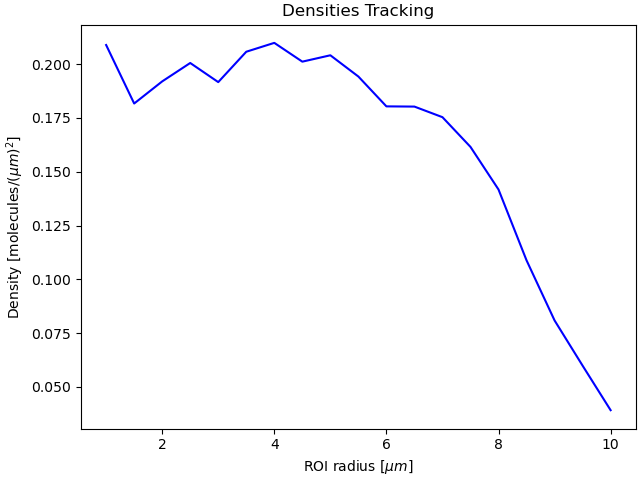

In [34]:
fig_dens, ax_dens = plt.subplots(constrained_layout=True)

ax_dens.plot(levels, density, '-b')
ax_dens.set_title('Densities Tracking')
ax_dens.set_xlabel('ROI radius [$\mu m$]')
ax_dens.set_ylabel('Density [molecules/$(\mu m)^2$]')

files:   0%|          | 0/80 [00:00<?, ?it/s]

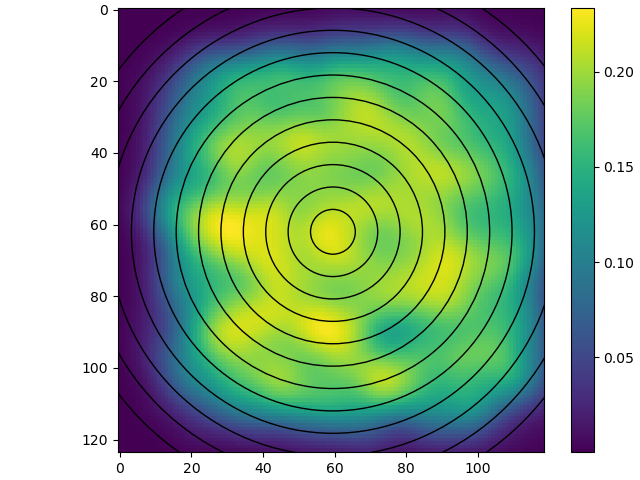

In [35]:
x_inds, y_inds = np.meshgrid(np.arange(normalized_profile.shape[0]), np.arange(normalized_profile.shape[1]))
tracking_density = np.zeros_like(normalized_profile).T

h5_files = getfiles(extension='h5', folder=roi_folder)
for h5 in tqdm(h5_files, desc='files', leave=False):
    loc_data = io.load(h5)
    loc_data = loc_data[loc_data['frame']==track_beg_frame]
    for x_temp, y_temp in zip(loc_data['x'], loc_data['y']):
        tracking_density += (1/px_size**2) * (1/(2*np.pi*5**2)) * np.exp(-(1/(2*5**2))*((x_temp-x_inds)**2+(y_temp-y_inds)**2))
tracking_density /= num_file

fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(tracking_density[border_up:border_down,border_left:border_right])
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05)
for i in range(1, 13):
    temp_circle = Circle((x_center-border_left, y_center-border_up), radius=i/px_size, fill=False)
    ax.add_patch(temp_circle)

#### **Calculating mean densities for each ROI level (TOCCSL)**

In [36]:
f = getfiles(folder=data_path.format(f'TOCCSL\{corr_folder}'), extension='h5')
roi_folder=data_path.format(f'TOCCSL\{corr_folder}')
num_file = len(f)

In [37]:
######## calculating mean densities for each ROI level
#looping through all files
overall_density = 0
for ff,i in zip(tqdm(f, desc='Files'),range(num_file)):
    cur = io.load(ff)
    
    overall_density += len(rois[-1](cur)[rois[-1](cur)['frame'] == rec_frame])/areas[-1]
    
    #looping through all levels/ rois
    for j in range(1, len(rois_to_evaluate)-1):
        cur_sel_prev = rois[j-1](cur)
        cur_sel_next = rois[j+1](cur)
        molecule_num = len(cur_sel_next[cur_sel_next['frame'] == rec_frame]) - len(cur_sel_prev[cur_sel_prev['frame'] == rec_frame])
        density[j-1] += molecule_num/(areas[j+1]-areas[j-1])
        
    if (i % 5) == 0 and i!= 0:
        mean_densities.append(density/i)
density = density/num_file
overall_density /= num_file

Files:   0%|          | 0/69 [00:00<?, ?it/s]

In [38]:
print('The overall particle density is', overall_density, 'molecules / (micrometer)^2')

The overall particle density is 0.2523549145321163 molecules / (micrometer)^2


Text(0, 0.5, 'Density [molecules/$(\\mu m)^2$]')

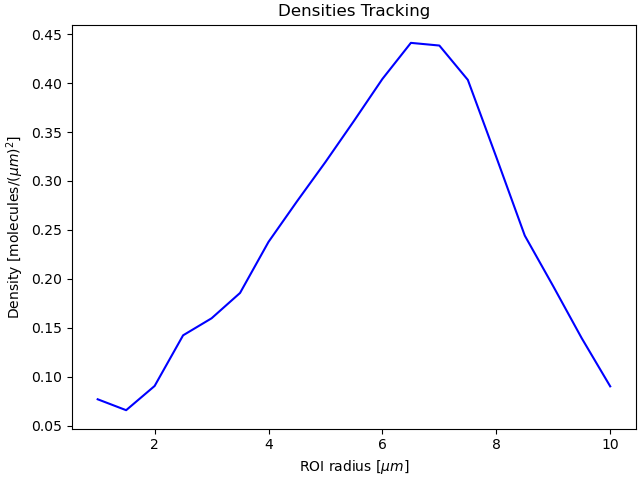

In [39]:
fig_dens, ax_dens = plt.subplots(constrained_layout=True)

ax_dens.plot(levels, density, '-b')
ax_dens.set_title('Densities Tracking')
ax_dens.set_xlabel('ROI radius [$\mu m$]')
ax_dens.set_ylabel('Density [molecules/$(\mu m)^2$]')

files:   0%|          | 0/69 [00:00<?, ?it/s]

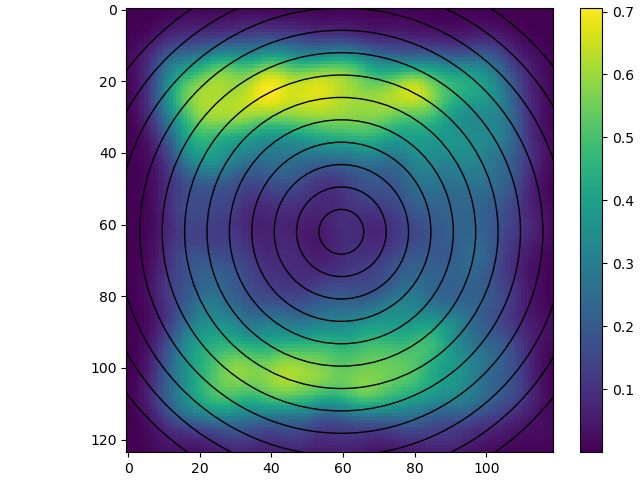

In [40]:
x_inds, y_inds = np.meshgrid(np.arange(normalized_profile.shape[0]), np.arange(normalized_profile.shape[1]))
tracking_density = np.zeros_like(normalized_profile).T

h5_files = getfiles(extension='h5', folder=roi_folder)
for h5 in tqdm(h5_files, desc='files', leave=False):
    loc_data = io.load(h5)  
    loc_data = loc_data[loc_data['frame']==rec_frame]
    for x_temp, y_temp in zip(loc_data['x'], loc_data['y']):
        tracking_density += (1/px_size**2) * (1/(2*np.pi*4**2)) * np.exp(-(1/(2*4**2))*((x_temp-x_inds)**2+(y_temp-y_inds)**2))
tracking_density /= num_file

fig, ax = plt.subplots(constrained_layout=True)
im = ax.imshow(tracking_density[border_up:border_down,border_left:border_right])
cbar = plt.colorbar(im, ax = ax, aspect=20, pad=0.05)
for i in range(1, 13):
    temp_circle = Circle((x_center-border_left, y_center-border_up), radius=i/px_size, fill=False)
    ax.add_patch(temp_circle)

## <u> **Single molecule and TOCCSL data filtering**
    
- filtering parameters are chosen on TOCCSL dataset and applied to sm dataset (if it extists) after fixing settings.
    
- if TOCCSL data is grouped into multiple groups: smallest ROI is applied to sm dataset

This part I did not use, it is left over from Marinas template. It is usded to further filter the localizations found by the Locator tool. It may still prove useful for other analyses, current compatability with the TOCCSL analysis below is however limited and would need to be added for some uses. If this feature would like to be used, uncomment

#display(mass_slider, bg_slider, size_slider, button_s, output_s)

Regardless, below cells should still be run for the following analysis to work. The image displayed also serves as a useful first check of the data.

In [52]:
manual_roi = True,
r = 5.0 # Specify radius in micro meters

if manual_roi:
    axis = r/px_size
    set_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))]

### **Settings**

In [53]:
####### set start frame for TOCCSL data
start_frame = 5
####### set start frame for sm data
start_frame_sm = 0

### **Localization of single molecules**

In [54]:
toccsl_folder = data_path.format(f'TOCCSL/{corr_folder}')
sm_folder = data_path.format(f'sm/{corr_folder}')

if manual_roi:
    min_ROI = set_roi[0]
else:
    min_ROI = make_ROI(fit_rel, chosen_value=max(roi_pos),fig_show=False)[0]

##### Check if sm_data exists
sm_bool = os.path.isdir(sm_folder)

### **Widget for filtering data**

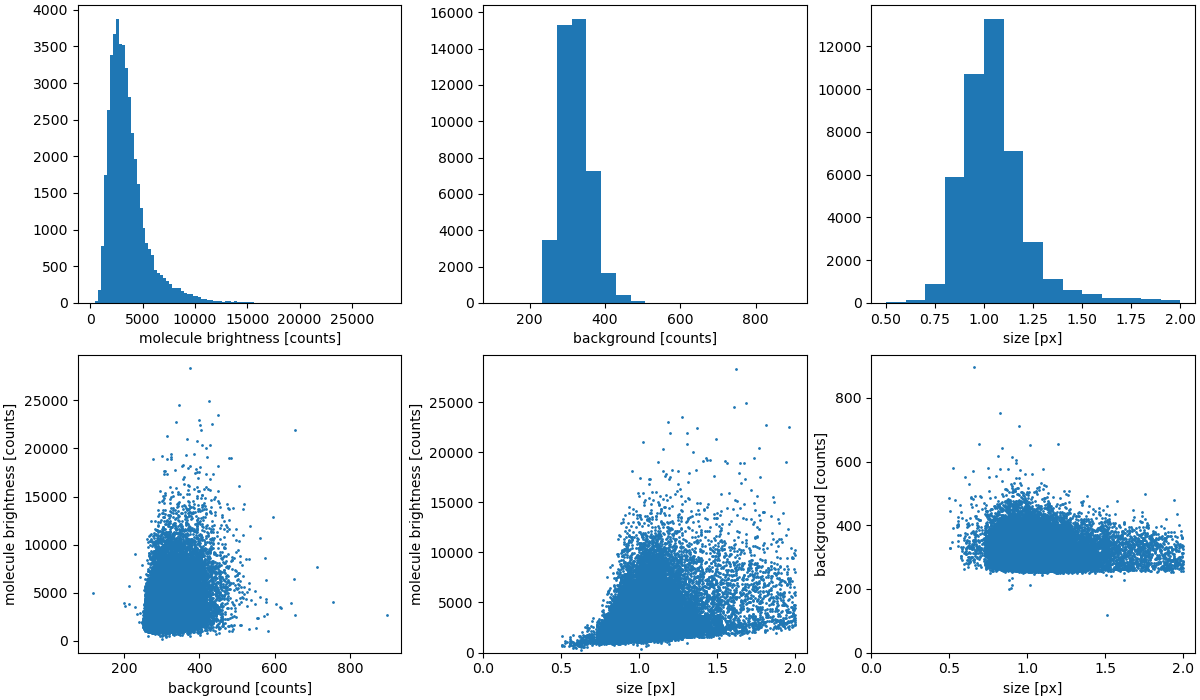

In [55]:
#### **Setting up initial data**

toccsl_folder = data_path.format(f'\\TOCCSL\\{corr_folder}')
sm_folder = data_path.format(f'\\sm\\{corr_folder}')

##### Check if sm_data exists
sm_bool = os.path.isdir(sm_folder)

toccsl_int_data = get_toccsl_dist(toccsl_folder, start_frame=start_frame, set_roi=set_roi, data_sort=groups_dicts)
toccsl_int_data_filtered = toccsl_int_data

if manual_roi:
    min_ROI = set_roi[0]
else:
    min_ROI = make_ROI(fit_rel, chosen_value=max(roi_pos),fig_show=False)[0]
if sm_bool == True:
    sm_int_data = get_sm_dist(sm_folder, start_frame=start_frame_sm, int_roi=min_ROI)
    sm_int_data_filtered = sm_int_data

#### **Setting up sliders for TOCCSL data**

def create_sliders(sm_int_data):
    '''
    Creates sliders for size, mass and background that correspond to sm_int_data
    Returns:
        size_slider
        mass_slider
        bg_slider
    '''
    
    if type(sm_int_data) == dict:
        sm_int_data = pd.concat(list(sm_int_data.values()))
    
    ####################### SIZE
    step = 0.01
    data = sm_int_data['size']
    size_slider = widgets.FloatRangeSlider(
        value=[data.min(), data.max()],
        min=data.min(),
        max=data.max()+step,
        step=step,
        description='Size:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.2f'
    )

    ####################### BRIGHTNESS
    step=0.01
    data = sm_int_data['mass']
    mass_slider = widgets.FloatRangeSlider(
        value=[data.min(), data.max()],
        min=data.min(),
        max=data.max()+step,
        step=step,
        description='Brightness:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
        overflow_x='auto'
    )


    ####################### BACKGROUND
    step = 0.01
    data = sm_int_data['bg']
    bg_slider = widgets.FloatRangeSlider(
        value=[data.min(), data.max()],
        min=data.min(),
        max=data.max()+step,
        step=step,
        description='Background:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.2f',
    )

    #size_slider.observe(update_all, 'value');
    #mass_slider.observe(update_all, 'value');
    #bg_slider.observe(update_all, 'value');
    
    return size_slider, mass_slider, bg_slider


size_slider, mass_slider, bg_slider = create_sliders(toccsl_int_data)

#### **Setting up button**

def create_button(toccsl_int_data, toccsl_folder, sm_bool):
    '''
    Creates button, which is used to indicate filtering is done.
    Upon pressing button:
        a) the global variable toccsl_int_data_filtered is fixed
        b) the single molecule overview figure is saved as 'toccsl_overview.png' in toccsl_folder
        c) the current filtering values as well as resulting mean single molecule intensities before and after filtering
           and the respective number of contributing molecules is saved in 'toccsl_filttering_parameters.xlsx' in toccsl_folder
    Returns:
        button_s: Button ipywidget object
        output_s: Output reads how much data is lost and how big the change in mean single molecule intensity is
    '''
    button_s = widgets.Button(description="Set!",button_style='info')
    output_s = widgets.Output()

    def on_button_clicked(b):
        with output_s:
            global toccsl_int_data_filtered
            if sm_bool == True:
                global sm_int_data_filtered
            global filter_parameters
            if type(toccsl_int_data) == dict:
                message = ''
                message2 = ''
                
                all_data_bef = pd.concat(list(toccsl_int_data.values()))
                lost = {}
                toccsl_int_data_filtered = {}
                toccsl_bef = {}
                toccsl_filt = {}
                for key, v in toccsl_int_data.items():
                    toccsl_int_data_filtered[key] = filtering(v, size_slider, mass_slider, bg_slider)
                    lost[key] = (1-len(toccsl_int_data_filtered[key])/len(toccsl_int_data[key]))*100
                    toccsl_bef[key] = np.median(toccsl_int_data[key]['mass'])
                    toccsl_filt[key] = np.median(toccsl_int_data_filtered[key]['mass'])
                    
                    message += key + ': {}% of data lost'.format(round(lost[key],2)) + '\n'
                    message2 += key + ': {}% of data lost; sm: {} counts (change of {}%)'.format(round(lost[key],2), round(toccsl_filt[key],2), round(100 - toccsl_filt[key]/toccsl_bef[key] *100,2)) + '\n'
                    
                all_data_filt = pd.concat(list(toccsl_int_data_filtered.values()))
            else: 
                all_data_bef = toccsl_int_data
                toccsl_int_data_filtered = filtering(toccsl_int_data, size_slider, mass_slider, bg_slider)
                all_data_filt = toccsl_int_data_filtered
                lost = (1-len(toccsl_int_data_filtered)/len(toccsl_int_data))*100
                toccsl_bef = np.mean(toccsl_int_data['mass'])
                toccsl_filt = np.mean(toccsl_int_data_filtered['mass'])
                
                message = '{}% of data lost'.format(round(lost,2))
                message2 = '{}% of data lost; sm: {} counts (change of {}%)'.format(round(lost,2), round(toccsl_filt,2), round(100 - toccsl_filt/toccsl_bef *100,2))
            filter_parameters = np.array([size_slider.value, mass_slider.value, bg_slider.value])
            if sm_bool == True:
                sm_int_data_filtered = filtering_sm(sm_int_data, filter_parameters)
            
                
            print(message2)
            fig.suptitle(message2, weight='bold')
            fig.canvas.draw()           
            fig.savefig(results_path.format('toccsl_overview.png'))
            
            filter_val = pd.DataFrame(data={'Brightness unfiltered [counts]': [min(all_data_bef['mass']), max(all_data_bef['mass'])],
                                    'Brightness filtered [counts]': mass_slider.value, 
                                    'Background unfiltered [counts]': [min(all_data_bef['bg']), max(all_data_bef['bg'])],
                                    'Background filtered [counts]': bg_slider.value,
                                    'Size unfiltered [px]': [min(all_data_bef['size']), max(all_data_bef['size'])],
                                    'Size filtered [px]': size_slider.value,
                                    '|': ['|']*2,
                                    'sm intensity unfiltered [counts]': [toccsl_bef] + [' '],
                                    'sm intensity filtered [counts]': [toccsl_filt] + [' '],
                                    '# molecules unfiltered': [len(all_data_bef)] + [' '],
                                    '# molecules filtered': [len(all_data_filt)] + [' '],
                                   },
                                index = ['min', 'max'])

            writer = pd.ExcelWriter(results_path.format('toccsl_filtering_parameters.xlsx')) 
            filter_val.to_excel(writer, sheet_name='filtering parameters')

            df = filter_val
            for column in df:
                column_width = max(df[column].astype(str).map(len).max(), len(column))
                col_idx = df.columns.get_loc(column)
                writer.sheets['filtering parameters'].set_column(col_idx+1, col_idx+1, column_width)

            writer.save()

    button_s.on_click(on_button_clicked)
    
    return button_s, output_s

button_s, output_s = create_button(toccsl_int_data, toccsl_folder, sm_bool)

#### **Setting up figure and displaying interactive elements of TOCCSL data**

def update_all(change):
    '''
    Updates single molecule distribution overview figure
    '''
    global toccsl_int_data
    if type(toccsl_int_data) == dict:
        bef = pd.concat(list(toccsl_int_data.values()))
        
        ax[0,0].clear()
        ax[0,1].clear()
        ax[0,2].clear()
        ax[1,0].clear()
        ax[1,1].clear()
        ax[1,2].clear()
        b1 = ax[0,0].hist(bef['mass'], bins=100);
        b2 = ax[0,1].hist(bef['bg'], bins=20);
        bins = ax[0,2].hist(bef['size'], bins=15)
        ax[1,0].plot(bef['bg'], bef['mass'], 'o', markersize=1)
        ax[1,1].plot(bef['size'], bef['mass'], 'o', markersize=1)
        ax[1,2].plot(bef['size'], bef['bg'], 'o', markersize=1)
        
        for d,c in zip(toccsl_int_data.items(), cm.rainbow(np.linspace(0, 1, len(toccsl_int_data)))):
            k,v = d
            
            filtered = filtering(v, size_slider, mass_slider, bg_slider)
    
            
            ax[0,0].hist(filtered['mass'], bins=b1[1]);
            ax[0,0].set_xlabel('single molecule brightness [counts]')
    
            ax[0,1].hist(filtered['bg'], bins=b2[1]);
            ax[0,1].set_xlabel('background [counts]')

            filt = ax[0,2].hist(filtered['size'], bins=bins[1])
            ax[0,2].set_xlabel('size [px]')

            ax[1,0].plot(filtered['bg'], filtered['mass'], 'o', markersize=1)
            ax[1,0].set_xlabel('background [counts]')
            ax[1,0].set_ylabel('single molecule brightness [counts]')
         
            ax[1,1].plot(filtered['size'], filtered['mass'], 'o', markersize=1)
            ax[1,1].set_xlabel('size [px]')
            ax[1,1].set_ylabel('single molecule brightness [counts]')
            ax[1,1].set_xlim(left=0)
            ax[1,1].set_ylim(bottom=0)

            ax[1,2].plot(filtered['size'], filtered['bg'], 'o', markersize=1)
            ax[1,2].set_xlabel('size [px]')
            ax[1,2].set_ylabel('background [counts]')
            ax[1,2].set_xlim(left=0)
            ax[1,2].set_ylim(bottom=0)
            
        for axx in ax.reshape(-1):
            axx.legend(['unfiltered (all data)'] + list(toccsl_int_data.keys()))
        
        fig.canvas.draw()
    else:
        filtered = filtering(toccsl_int_data, size_slider, mass_slider, bg_slider)
    
        ax[0,0].clear()
        b = ax[0,0].hist(toccsl_int_data['mass'], bins=100);
        ax[0,0].hist(filtered['mass'], bins=b[1]);
        ax[0,0].set_xlabel('single molecule brightness [counts]')

        ax[0,1].clear()
        b = ax[0,1].hist(toccsl_int_data['bg'], bins=20);
        ax[0,1].hist(filtered['bg'], bins=b[1]);
        ax[0,1].set_xlabel('background [counts]')

        ax[0,2].clear()
        bins = ax[0,2].hist(toccsl_int_data['size'], bins=15)
        filt = ax[0,2].hist(filtered['size'], bins=bins[1])
        ax[0,2].set_xlabel('size [px]')

        ax[1,0].clear()
        ax[1,0].plot(toccsl_int_data['bg'], toccsl_int_data['mass'], 'o', markersize=1)
        ax[1,0].plot(filtered['bg'], filtered['mass'], 'o', markersize=1)
        ax[1,0].set_xlabel('background [counts]')
        ax[1,0].set_ylabel('single molecule brightness [counts]')

        ax[1,1].clear()
        ax[1,1].plot(toccsl_int_data['size'], toccsl_int_data['mass'], 'o', markersize=1)
        ax[1,1].plot(filtered['size'], filtered['mass'], 'o', markersize=1)
        ax[1,1].set_xlabel('size [px]')
        ax[1,1].set_ylabel('single molecule brightness [counts]')
        ax[1,1].set_xlim(left=0)
        ax[1,1].set_ylim(bottom=0)

        ax[1,2].clear()
        ax[1,2].plot(toccsl_int_data['size'], toccsl_int_data['bg'], 'o', markersize=1)
        ax[1,2].plot(filtered['size'], filtered['bg'], 'o', markersize=1)
        ax[1,2].set_xlabel('size [px]')
        ax[1,2].set_ylabel('background [counts]')
        ax[1,2].set_xlim(left=0)
        ax[1,2].set_ylim(bottom=0)

        fig.canvas.draw()
    
    
size_slider.observe(update_all, 'value');
mass_slider.observe(update_all, 'value');
bg_slider.observe(update_all, 'value');

#display(mass_slider, bg_slider, size_slider, button_s, output_s)


fig, ax = plt.subplots(2,3, figsize=(12,7), constrained_layout=True)


if type(toccsl_int_data) == dict and len(toccsl_int_data) > 1:
    for k, v in toccsl_int_data.items():
    
        ##################### brightness
        b = ax[0,0].hist(v['mass'], bins=100);
        #ax[0,0].hist(toccsl_int_data_filtered['mass'], bins=b[1]);

        ##################### background
        b = ax[0,1].hist(v['bg'], bins=20);
        #ax[0,1].hist(toccsl_int_data_filtered['bg'], bins=b[1]);

        ##################### size
        #line, = ax.plot(x, np.sin(x))
        bins = ax[0,2].hist(v['size'], bins=15)
        #filt = ax[0,2].hist(toccsl_int_data_filtered['size'], bins=bins[1])
    
        ##################### background vs. brightness
        ax[1,0].plot(v['bg'], v['mass'], 'o', markersize=1)
        #ax[1,0].plot(toccsl_int_data_filtered['bg'], toccsl_int_data_filtered['mass'], 'o', markersize=1)

        ##################### size vs. brightness
        ax[1,1].plot(v['size'], v['mass'], 'o', markersize=1)
        #ax[1,1].plot(toccsl_int_data_filtered['size'], sm_int_data_filtered['mass'], 'o', markersize=1)

        ##################### size vs. background
        ax[1,2].plot(v['size'], v['bg'], 'o', markersize=1)
        #ax[1,2].plot(toccsl_int_data_filtered['size'], toccsl_int_data_filtered['bg'], 'o', markersize=1)
        
    ax[0,0].set_xlabel('molecule brightness [counts]')
    
    ax[0,1].set_xlabel('background [counts]')   
    
    ax[0,2].set_xlabel('size [px]')

    ax[1,0].set_xlabel('background [counts]')
    ax[1,0].set_ylabel('molecule brightness [counts]')
    
    ax[1,1].set_xlabel('size [px]')
    ax[1,1].set_ylabel('molecule brightness [counts]')
    ax[1,1].set_xlim(left=0)
    ax[1,1].set_ylim(bottom=0)
    
    ax[1,2].set_xlabel('size [px]')
    ax[1,2].set_ylabel('background [counts]')
    ax[1,2].set_xlim(left=0)
    ax[1,2].set_ylim(bottom=0);
    
    for axx in ax.reshape(-1):
        axx.legend(list(toccsl_int_data.keys()))
    
else:
    
    ##################### brightness
    b = ax[0,0].hist(toccsl_int_data['mass'], bins=100);
    #ax[0,0].hist(toccsl_int_data_filtered['mass'], bins=b[1]);
    ax[0,0].set_xlabel('molecule brightness [counts]')

    ##################### background
    b = ax[0,1].hist(toccsl_int_data['bg'], bins=20);
    #ax[0,1].hist(toccsl_int_data_filtered['bg'], bins=b[1]);
    ax[0,1].set_xlabel('background [counts]')

    ##################### size
    #line, = ax.plot(x, np.sin(x))
    bins = ax[0,2].hist(toccsl_int_data['size'], bins=15)
    #filt = ax[0,2].hist(toccsl_int_data_filtered['size'], bins=bins[1])
    ax[0,2].set_xlabel('size [px]')

    ##################### background vs. brightness
    ax[1,0].plot(toccsl_int_data['bg'], toccsl_int_data['mass'], 'o', markersize=1)
    #ax[1,0].plot(toccsl_int_data_filtered['bg'], toccsl_int_data_filtered['mass'], 'o', markersize=1)
    ax[1,0].set_xlabel('background [counts]')
    ax[1,0].set_ylabel('molecule brightness [counts]')

    ##################### size vs. brightness
    ax[1,1].plot(toccsl_int_data['size'], toccsl_int_data['mass'], 'o', markersize=1)
    #ax[1,1].plot(toccsl_int_data_filtered['size'], sm_int_data_filtered['mass'], 'o', markersize=1)
    ax[1,1].set_xlabel('size [px]')
    ax[1,1].set_ylabel('molecule brightness [counts]')
    ax[1,1].set_xlim(left=0)
    ax[1,1].set_ylim(bottom=0)

    ##################### size vs. background
    ax[1,2].plot(toccsl_int_data['size'], toccsl_int_data['bg'], 'o', markersize=1)
    #ax[1,2].plot(toccsl_int_data_filtered['size'], toccsl_int_data_filtered['bg'], 'o', markersize=1)
    ax[1,2].set_xlabel('size [px]')
    ax[1,2].set_ylabel('background [counts]')
    ax[1,2].set_xlim(left=0)
    ax[1,2].set_ylim(bottom=0);


## <u> **TOCCSL Analysis by Maximilian Drozd**

The following parts form the oligomeric analysis, in particular the brightness analysis, and later the bleaching based analysis. This first part is to do the brightness analysis, the monomer brightness PDF is plotted and the fitting of the experimental data to higher order oligomer PDFs is done. Further tools for/using the brightness analysis, such as optimizing the monomer PDF used, or plotting the development over frames or the ROI dependence, come later.

In [56]:
from toccsl_analysis import *

In [66]:
######## limit on x axis for pdfs in photons
lim = 1000
######## highest oligomeric state to consider
lim_con = 4
######## number of bootstrap iterations
n_bootstrap = 400
######## starting frame from which the monomer data should be taken from
monomer_start_frame = 20
######## how many frames of the single molecule data should be taken
frames_taken = 40
######## choose which dataset the monomer signals should be taken from (identifier meanings see below)
monomer_id = 'dvTOC'
######## ROI used for sm measurements in micro meters. If None, always the analysis ROI is taken.
monomer_roi = 3.0
######## ROI used for analysed measurements in micro meters
analysis_roi = 2.24
######## conversion factor from counts to photons
conversion_factor = 15.7/300
######## factor choosing how broad to make the standard deviation of the convolution kernel
sigma_factor = 2.0
######## If true the monomeric data is fit to a lognormal distribution
fit_lognorm = False

In [67]:
# This cell here might need to be adatped to the personal naming of folders
in_use = ['dvSM', 'dvTOC'] # the two folders that are just called 'sm' and 'TOCCSL'
def get_monomer_folder(monomer_id):
    monomer_folder = None
    if monomer_id == 'mvSM':
        monomer_folder = data_path.format(f'sm_monovalent/{corr_folder}')
    elif monomer_id == 'mvTOC':
        monomer_folder = data_path.format(f'TOCCSL_monovalent/{corr_folder}')
    elif monomer_id == 'dvSM':
        monomer_folder = data_path.format(f'sm_divalent/{corr_folder}')
    elif monomer_id == 'dvTOC':
        monomer_folder = data_path.format(f'TOCCSL_divalent/{corr_folder}')
    elif monomer_id == 'mvSMold':
        monomer_folder = data_path.format(f'sm_old_divalent/{corr_folder}')
    elif monomer_id == 'dvSMold':
        monomer_folder = data_path.format(f'sm_old_monovalent/{corr_folder}')
    if monomer_id in in_use:
        if monomer_id[-2:] == 'SM':
            monomer_folder = data_path.format(f'sm/{corr_folder}')
        if monomer_id[-3:] == 'TOC':
            monomer_folder = data_path.format(f'TOCCSL/{corr_folder}')
    return monomer_folder

In [68]:
toccsl_folder = data_path.format(f'TOCCSL/{corr_folder}')
sm_folder = data_path.format(f'sm/{corr_folder}')

In [69]:
monomer_folder = get_monomer_folder(monomer_id)

if monomer_roi == None:
    monomer_roi = analysis_roi

axis = monomer_roi/px_size
temp_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))][0]

monomer_data = get_sm_dist(monomer_folder, start_frame=0, int_roi=temp_roi)
monomer_data = monomer_data[monomer_data['frame']>=monomer_start_frame]
monomer_data = monomer_data[monomer_data['frame']<monomer_start_frame+frames_taken]

print(f'{len(monomer_data)} data points available of single molecule brightness measurements')

2481 data points available of single molecule brightness measurements


In [70]:
axis = analysis_roi/px_size
set_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))]

toccsl_int_data_filtered = get_sm_dist(toccsl_folder, start_frame=start_frame, int_roi=set_roi[0])
sm_int_data_filtered = get_sm_dist(sm_folder, start_frame=start_frame_sm, int_roi=set_roi[0])

In [71]:
roi_identifier_0 = str(analysis_roi)
    
if monomer_roi != None:
    roi_identifier_1 = str(monomer_roi)
else:
    roi_identifier_1 = roi_identifier_0

roi_identifier = roi_identifier_0 + '_' + roi_identifier_1

C:\Users\mrdxy\AppData\Local\Temp\ipykernel_6612\1488970549.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(12,5))


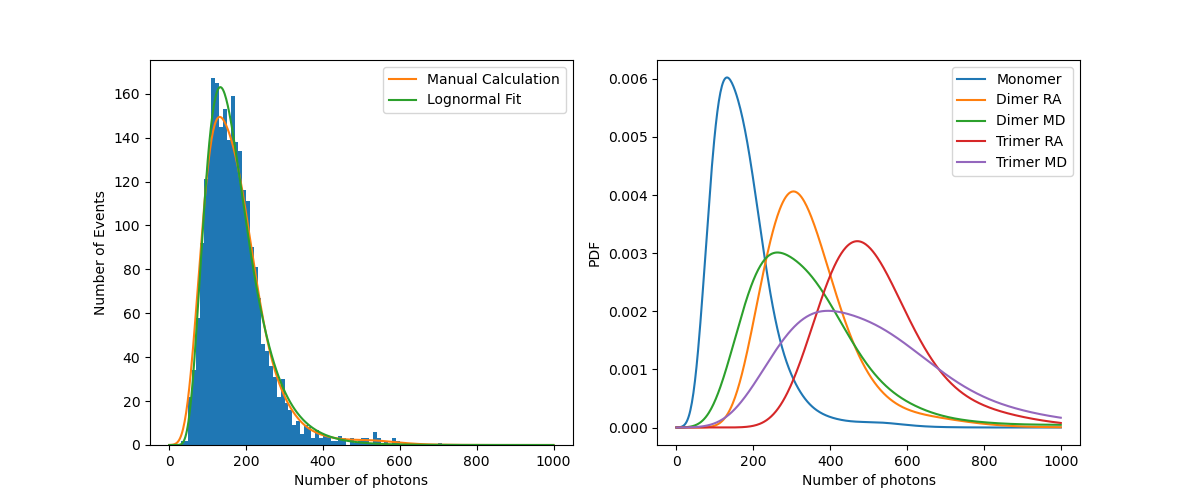

In [72]:
### This cell plots the monomer brightness PDF used as well as the higher order oligomers calculated
fig, ax = plt.subplots(1, 2, figsize=(12,5))
monomer_pdf = generate_pdf(monomer_data['mass']*conversion_factor, sigma_factor=sigma_factor)
monomer_pdf_lognorm = generate_pdf(monomer_data['mass']*conversion_factor, sigma_factor=sigma_factor, fit_lognorm=True)
bins=100
plot_vals = np.linspace(0, lim, 500)
ax[0].hist(conversion_factor*monomer_data['mass'], bins=bins, range=(0, lim))
ax[0].plot(plot_vals, len(monomer_data['mass'])*(lim/bins)*monomer_pdf(plot_vals), label='Manual Calculation')
ax[0].plot(plot_vals, len(monomer_data['mass'])*(lim/bins)*monomer_pdf_lognorm(plot_vals), label='Lognormal Fit')
ax[0].set_xlabel('Number of photons')
ax[0].set_ylabel('Number of Events')
ax[0].legend()

monomer_pdf_values = monomer_pdf(plot_vals)
dimer_pdf_values = scipy.signal.convolve(monomer_pdf_values, monomer_pdf_values)[:len(monomer_pdf_values)]/np.sum(monomer_pdf_values)
trimer_pdf_values = scipy.signal.convolve(monomer_pdf_values, dimer_pdf_values)[:len(monomer_pdf_values)]/np.sum(monomer_pdf_values)
ax[1].plot(plot_vals, monomer_pdf_values, label='Monomer')
ax[1].plot(plot_vals, dimer_pdf_values, label='Dimer RA')
ax[1].plot(plot_vals, monomer_pdf(plot_vals/2)/2, label='Dimer MD')
#ax[1].plot(plot_vals, dimer_empirical_pdf(plot_vals), label='Dimer Empirical')
ax[1].plot(plot_vals, trimer_pdf_values, label='Trimer RA')
ax[1].plot(plot_vals, monomer_pdf(plot_vals/3)/3, label='Trimer MD')
ax[1].set_xlabel('Number of photons')
ax[1].set_ylabel('PDF')
ax[1].legend()
fig.savefig(results_path.format(f'PDF_{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}_roi{roi_identifier_1}.png'), dpi=150)

Optimization MD: Success after 0.07906937599182129 s
Bootstrapping MD took 22.68073010444641 s
Optimization RA: Success after 0.1255664825439453 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping RA took 29.54919743537903 s
Completed all after 64.24681735038757 s



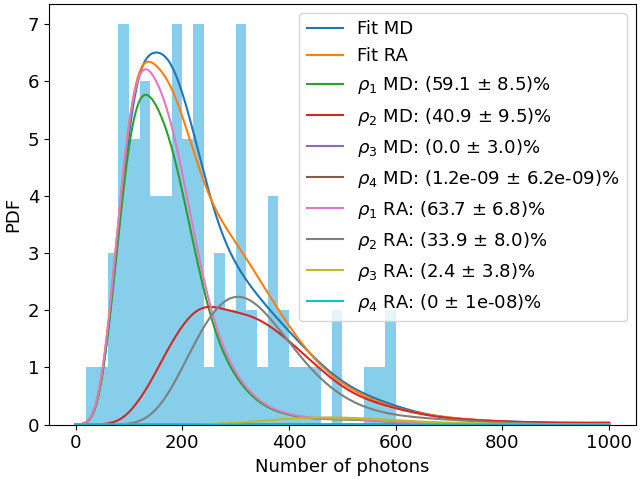

In [73]:
# This cell performs the oligomeric analysis of the TOCCSL data
n_bins = 50 # The number of bins the brightness values are binned into
analysis_frame = rec_frame # The frame on which the oligomeric analysis is done on
analysis_data = toccsl_int_data_filtered[toccsl_int_data_filtered['frame']==analysis_frame]['mass']
savepath = results_path.format(f'TOCCSLResult_Recovery_mono{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}_roi{roi_identifier}_n{lim_con}.png')
alphas, errors, fitted_pd, kstests = get_alphas(analysis_data*conversion_factor, monomer_data*conversion_factor, lim=lim, lim_con=lim_con, n_bootstrap=n_bootstrap, sigma_factor=sigma_factor, fit_lognorm=fit_lognorm, bins=n_bins, savepath=savepath)
toccsl_res = pd.DataFrame(data={'Fraction MD': alphas[0],'Error MD': errors[0], 'Fraction RA': alphas[1],'Error RA': errors[1], 'KS-Test MD': np.pad(kstests[0], (0, lim_con-2)), 'KS-Test RA': np.pad(kstests[1], (0, lim_con-2))})
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
toccsl_res.to_excel(writer, sheet_name='TOCCSL Results')
writer.save()

In [ ]:
# This cell performs the oligomeric analysis of the sm data
n_bins = 50 # The number of bins the brightness values are binned into
analysis_frame = 0 # The frame on which the oligomeric analysis is done on
analysis_data = sm_int_data_filtered[sm_int_data_filtered['frame']==analysis_frame]['mass']
savepath = results_path.format(f'TOCCSLResult_Tracking1_mono{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}_roi{roi_identifier}_n{lim_con}.png')
alphas, errors, fitted_pd, kstests = get_alphas(analysis_data*conversion_factor, monomer_data*conversion_factor, lim=lim, lim_con=lim_con, n_bootstrap=n_bootstrap, sigma_factor=sigma_factor, fit_lognorm=fit_lognorm, bins=n_bins, savepath=savepath)
toccsl_res = pd.DataFrame(data={'Fraction MD': alphas[0],'Error MD': errors[0], 'Fraction RA': alphas[1],'Error RA': errors[1], 'KS-Test MD': np.pad(kstests[0], (0, lim_con-2)), 'KS-Test RA': np.pad(kstests[1], (0, lim_con-2))})
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
toccsl_res.to_excel(writer, sheet_name='TOCCSL Results')
writer.save()

### **Determine Optimal ROI and Startframe**

The following cells help to optimize the monomer brightness PDF used, by optimizing parameters such as the starting frame from which localizations are taken, the number of frames taken and the ROI used. There is also a cell that allows the comparison of two specific, individual sets of parameters.

In [83]:
### limit on x axis for pdfs in photons
lim = 1000

In [84]:
### choose which dataset the monomer signals should be taken from (identifier meanings defined earlier)
monomer_id = 'dvTOC'

monomer_folder = get_monomer_folder(monomer_id)

In [95]:
### The following cells allow the investigation of the monomer PDF dependence on the ROI size

In [89]:
monomer_start_frame = 40
frames_taken = 40
chosen_roi_group = 1 # Choose which ROIs to investigate. See which group each number corresponds to in below cell

In [90]:
if chosen_roi_group<10:
    chosen_roi_string = f'0{chosen_roi_group}'
else:
    chosen_roi_string = f'{chosen_roi_group}'
savepath_pdfs = None # results_path.format(f'PdfROIs_{chosen_roi_string}_mono{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}.png')

In [91]:
if chosen_roi_group==1:
    roi_radii = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
elif chosen_roi_group==2:
    roi_radii = np.array([4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==3:
    roi_radii = np.array([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==4:
    roi_radii = np.array([3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0])
elif chosen_roi_group==5:
    roi_radii = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
elif chosen_roi_group==6:
    roi_radii = np.array([3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==7:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5])
elif chosen_roi_group==8:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==9:
    roi_radii = np.array([6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0])
elif chosen_roi_group==10:
    roi_radii = np.array([2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5])

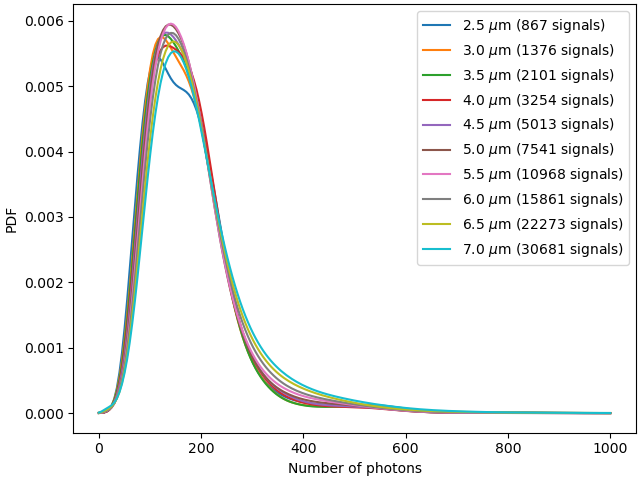

In [92]:
pdf_dependence_rois(monomer_folder, roi_center, roi_radii, conversion_factor=conversion_factor, px_size=px_size, sigma_factor=sigma_factor, monomer_start_frame=monomer_start_frame, frames_taken=frames_taken, lim=lim, savepath=savepath_pdfs)

In [ ]:
### The following cells allow the investigation of the monomer PDF dependence on the ROI size

In [93]:
startframe_dep_roi = 3.0
frames_taken = 40

startframes = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
startframes = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

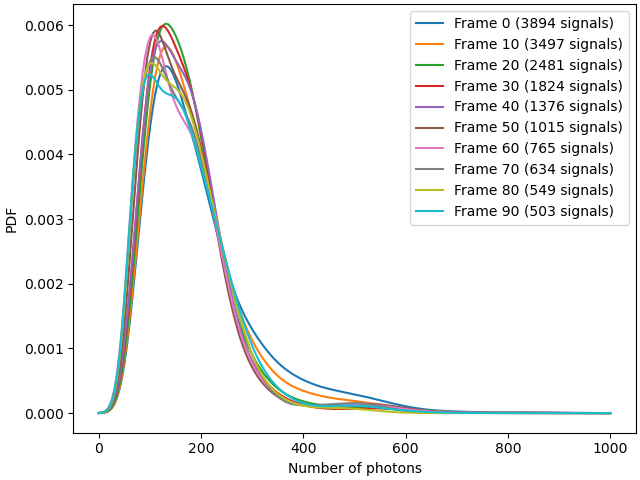

In [94]:
pdf_dependence_startframe(monomer_folder, roi_center, startframes, conversion_factor=conversion_factor, px_size=px_size, sigma_factor=sigma_factor, monomer_roi=startframe_dep_roi, lim=lim, frames_taken=frames_taken, savepath=None)

In [96]:
### This cell allows the comparison of two specific monomer PDFs

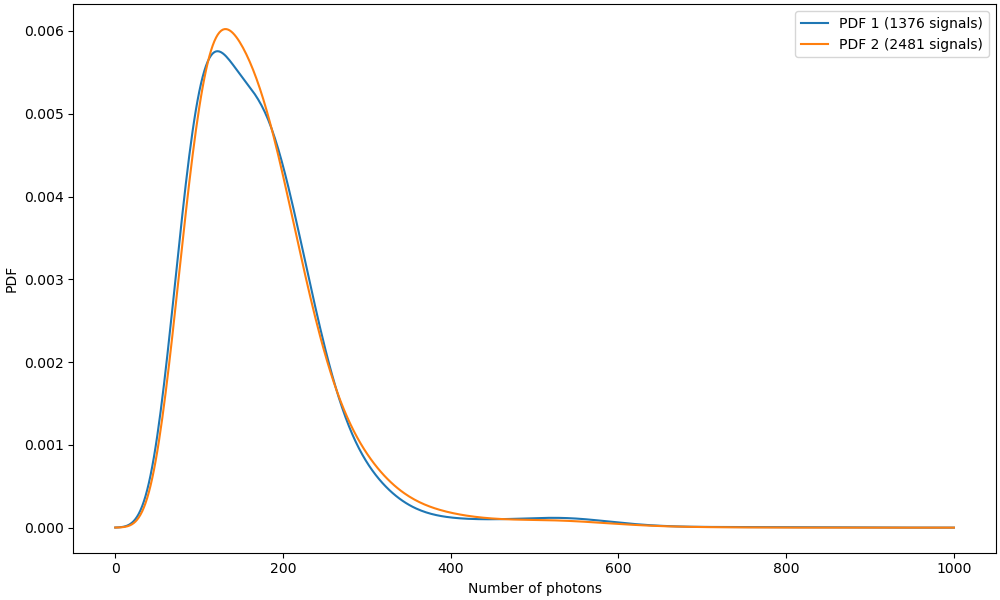

In [97]:
### Compare 2 PDF
lim_comparison = 1000
monomer_id_1 = 'dvTOC'; monomer_roi_1 = 3.0; startframe_1 = 40; frames_taken_1 = 40
monomer_id_2 = 'dvTOC'; monomer_roi_2 = 3.0; startframe_2 = 20; frames_taken_2 = 40

comparison_plotvals = np.linspace(0, lim_comparison, 500)

roi_sm_1 = roi.EllipseROI(roi_center, (monomer_roi_1/px_size, monomer_roi_1/px_size))
monomer_folder_1 = get_monomer_folder(monomer_id_1)
monomer_data_1 = get_sm_dist(monomer_folder_1, start_frame=0, int_roi=roi_sm_1)
monomer_data_1 = monomer_data_1[monomer_data_1['frame']>=startframe_1]
monomer_data_1 = monomer_data_1[monomer_data_1['frame']<startframe_1+frames_taken_1]
roi_sm_2 = roi.EllipseROI(roi_center, (monomer_roi_2/px_size, monomer_roi_2/px_size))
monomer_folder_2 = get_monomer_folder(monomer_id_2)
monomer_data_2 = get_sm_dist(monomer_folder_2, start_frame=0, int_roi=roi_sm_2)
monomer_data_2 = monomer_data_2[monomer_data_2['frame']>=startframe_2]
monomer_data_2 = monomer_data_2[monomer_data_2['frame']<startframe_2+frames_taken_2]

monomer_pdf_1 = generate_pdf(monomer_data_1['mass']*conversion_factor, sigma_factor=sigma_factor)
monomer_pdf_2 = generate_pdf(monomer_data_2['mass']*conversion_factor, sigma_factor=sigma_factor)
fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True)
ax.plot(comparison_plotvals, monomer_pdf_1(comparison_plotvals), label=f'PDF 1 ({len(monomer_data_1)} signals)')
ax.plot(comparison_plotvals, monomer_pdf_2(comparison_plotvals), label=f'PDF 2 ({len(monomer_data_2)} signals)')
ax.set_xlabel('Number of photons')
ax.set_ylabel('PDF')
ax.legend()
#fig.savefig(results_path.format(f'PDF_comparison.png'))

In [98]:
### This cell compared the monomer PDFs of all probes in my experiment, might not be useful for other studies

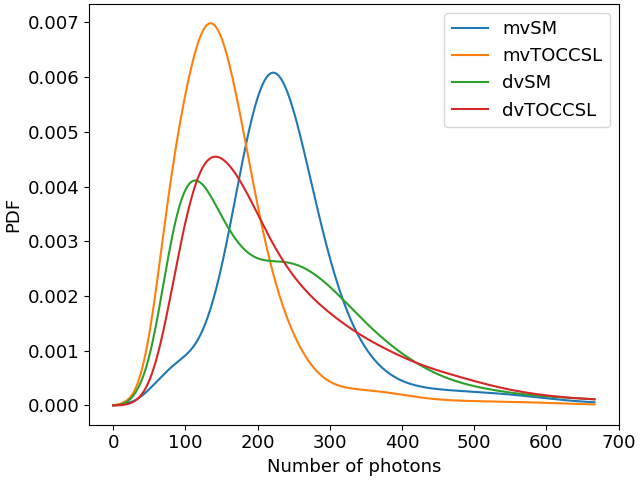

In [99]:
lim_comparison = 1000*2/3
monomer_roi_1 = 5; startframe_1 = 0; frames_taken_1 = 10

comparison_plotvals = np.linspace(0, lim_comparison, 500)

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(constrained_layout=True)

monomer_id_1 = 'mvSM'; 
roi_sm_1 = roi.EllipseROI(roi_center, (monomer_roi_1/px_size, monomer_roi_1/px_size))
monomer_folder_1 = get_monomer_folder(monomer_id_1)
monomer_data_1 = get_sm_dist(monomer_folder_1, start_frame=0, int_roi=roi_sm_1)
monomer_data_1 = monomer_data_1[monomer_data_1['frame']>=startframe_1]
monomer_data_1 = monomer_data_1[monomer_data_1['frame']<startframe_1+frames_taken_1]
monomer_pdf_1 = generate_pdf(monomer_data_1['mass']*conversion_factor, sigma_factor=sigma_factor)
ax.plot(comparison_plotvals, monomer_pdf_1(comparison_plotvals), label=f'mvSM')
monomer_id_1 = 'mvTOC';
roi_sm_1 = roi.EllipseROI(roi_center, (monomer_roi_1/px_size, monomer_roi_1/px_size))
monomer_folder_1 = get_monomer_folder(monomer_id_1)
monomer_data_1 = get_sm_dist(monomer_folder_1, start_frame=0, int_roi=roi_sm_1)
monomer_data_1 = monomer_data_1[monomer_data_1['frame']>=startframe_1+5]
monomer_data_1 = monomer_data_1[monomer_data_1['frame']<startframe_1+frames_taken_1+5]
monomer_pdf_1 = generate_pdf(monomer_data_1['mass']*conversion_factor, sigma_factor=sigma_factor)
ax.plot(comparison_plotvals, monomer_pdf_1(comparison_plotvals), label=f'mvTOCCSL')
monomer_id_1 = 'dvSM';
roi_sm_1 = roi.EllipseROI(roi_center, (monomer_roi_1/px_size, monomer_roi_1/px_size))
monomer_folder_1 = get_monomer_folder(monomer_id_1)
monomer_data_1 = get_sm_dist(monomer_folder_1, start_frame=0, int_roi=roi_sm_1)
monomer_data_1 = monomer_data_1[monomer_data_1['frame']>=startframe_1]
monomer_data_1 = monomer_data_1[monomer_data_1['frame']<startframe_1+frames_taken_1]
monomer_pdf_1 = generate_pdf(monomer_data_1['mass']*conversion_factor, sigma_factor=sigma_factor)
ax.plot(comparison_plotvals, monomer_pdf_1(comparison_plotvals), label=f'dvSM')
monomer_id_1 = 'dvTOC'; 
roi_sm_1 = roi.EllipseROI(roi_center, (monomer_roi_1/px_size, monomer_roi_1/px_size))
monomer_folder_1 = get_monomer_folder(monomer_id_1)
monomer_data_1 = get_sm_dist(monomer_folder_1, start_frame=0, int_roi=roi_sm_1)
monomer_data_1 = monomer_data_1[monomer_data_1['frame']>=startframe_1+5]
monomer_data_1 = monomer_data_1[monomer_data_1['frame']<startframe_1+frames_taken_1+5]
monomer_pdf_1 = generate_pdf(monomer_data_1['mass']*conversion_factor, sigma_factor=sigma_factor)
ax.plot(comparison_plotvals, monomer_pdf_1(comparison_plotvals), label=f'dvTOCCSL')


ax.set_xlabel('Number of photons')
ax.set_ylabel('PDF')
ax.legend()
fig.savefig(results_path.format(f'well_comparison.png'), dpi=150)
plt.rcParams.update({'font.size': 10})

### **Development with Frames**

The following cells allow to plot how the oligomeric fractions develop over a sequence of frames

In [152]:
analysis_id = 'Tracking' # Choose 'Recovery' or 'Tracking' for TOCCSL or tracking measurements
######## choose which dataset the monomer signals should be taken from (identifier meanings given earlier)
monomer_id = 'mvSM'

######## highest oligomeric state to consider
lim_con = 2
######## number of bootstrap iterations
n_bootstrap = 400
######## starting frame from which the monomer data should be taken from
monomer_start_frame = 0
######## how many frames of the single molecule data should be taken
frames_taken = 5
######## ROI used for sm measurements in micro meters. If None, always the analysis ROI is taken.
monomer_roi = 6.0
######## ROI used for analysed measurements in micro meters
analysis_roi = 5.5

# Initial frame from which to investigate the development, first frame is frame 0
initial_frame = 0
# How many frames subsequent to the initial frame should be investigated
iterations = 20

In [ ]:
axis = analysis_roi/px_size
set_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))]
if analysis_id == 'Recovery':
    data_converted = get_sm_dist(toccsl_folder, start_frame=start_frame, int_roi=set_roi[0])
elif analysis_id == 'Tracking':
    data_converted = get_sm_dist(sm_folder, start_frame=start_frame_sm, int_roi=set_roi[0])
else:
    raise Exception("analysis_id has to equal either Recovery or Tracking")
data_converted['mass'] *= conversion_factor

monomer_folder = get_monomer_folder(monomer_id)
axis = monomer_roi/px_size
temp_roi = [roi.EllipseROI((x_center, y_center), (axis, axis))][0]
monomer_data = get_sm_dist(monomer_folder, start_frame=0, int_roi=temp_roi)
monomer_data = monomer_data[monomer_data['frame']>=monomer_start_frame]
monomer_data = monomer_data[monomer_data['frame']<monomer_start_frame+frames_taken]

roi_identifier_0 = str(analysis_roi)   
if monomer_roi != None:
    roi_identifier_1 = str(monomer_roi)
else:
    roi_identifier_1 = roi_identifier_0
roi_identifier = roi_identifier_0 + '_' + roi_identifier_1

In [154]:
savepath = results_path.format(f'Fractions_{analysis_id}_mono{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}_roi{roi_identifier}_n{lim_con}.png')

In [155]:
def fit_func_1(t, r0, lam):
    return (2.0 + r0)*np.exp(lam*t) - 2.0

def fit_func_2(t, r0, lam, s):
    return ((1+r0)*s + (2+r0)*(1-s)*np.exp(-lam*t) - 2*(1-s/2)*np.exp(-2*lam*t)) / ((1-s/2)*np.exp(-2*lam*t) + s/2)

def fit_fraction(alphas, errors, t0, savepath=None):
    alphas_MD=alphas[0]; alphas_RA=alphas[1]; errors_MD=errors[0]; errors_RA=errors[1]
    ratio_MD = alphas_MD[:,0]/alphas_MD[:,1]
    error_ratio_MD = ratio_MD*np.sqrt((errors_MD[:,0]/alphas_MD[:,0])**2+(errors_MD[:,1]/alphas_MD[:,1])**2)
    ratio_RA = alphas_RA[:,0]/alphas_RA[:,1]
    error_ratio_RA = ratio_RA*np.sqrt((errors_RA[:,0]/alphas_RA[:,0])**2+(errors_RA[:,1]/alphas_RA[:,1])**2)
    fig, ax = plt.subplots(constrained_layout=True)
    t_points = np.arange(len(ratio_MD))+t0
    t_plotting = np.linspace(t0, t0+len(ratio_MD)-1, 200)
    params_MD, cov_MD = optimize.curve_fit(fit_func_1, t_points, ratio_MD, p0=(1.0,0.1), sigma=error_ratio_MD)
    params_RA, cov_RA = optimize.curve_fit(fit_func_1, t_points, ratio_RA, p0=(1.0,0.1), sigma=error_ratio_RA)
    ax.errorbar(t_points, ratio_MD, yerr=error_ratio_MD, marker='o', linestyle='None', capsize=5, label='MD')
    ax.plot(t_plotting, fit_func_1(t_plotting, *params_MD), label='Fit MD')
    ax.errorbar(t_points, ratio_RA, yerr=error_ratio_RA, marker='o', linestyle='None', capsize=5, label='RA')
    ax.plot(t_plotting, fit_func_1(t_plotting, *params_RA), label='Fit RA')
    ax.set_xlabel('Step')
    ax.set_ylabel(r'$\alpha_1$/$\alpha_2$')
    ax.legend()
    if savepath != None:
        fig.savefig(savepath)
    return [params_MD, params_RA], [np.diag(cov_MD), np.diag(cov_RA)]

Optimization MD: Success after 0.06287670135498047 s
Bootstrapping MD took 18.206072568893433 s
Optimization RA: Success after 0.06250500679016113 s
Bootstrapping RA took 16.303128957748413 s
Completed all after 53.86542725563049 s

Optimization MD: Success after 0.06251001358032227 s
Bootstrapping MD took 16.298359870910645 s
Optimization RA: Success after 0.04690265655517578 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping RA took 14.647845983505249 s
Completed all after 49.12417674064636 s

Optimization MD: Success after 0.04733705520629883 s
Bootstrapping MD took 15.413692951202393 s
Optimization RA: Success after 0.04687809944152832 s
Bootstrapping RA took 15.381726503372192 s
Completed all after 48.75406098365784 s

Optimization MD: Success after 0.046883583068847656 s
Bootstrapping MD took 15.00024700164795 s
Optimization RA: Success after 0.047307491302490234 s
Bootstrapping RA took 14.71892237663269 s
Completed all after 47.68857455253601 s

Optimization MD: Success after 0.04890251159667969 s
Bootstrapping MD took 15.081512451171875 s
Optimization RA: Success after 0.06289911270141602 s
Bootstrapping RA took 14.74740219116211 s
Completed all after 48.14789056777954 s

Optimization MD: Success after 0.047322750091552734 s
Bootstrapping MD took 15.758077144622803 s
Optimization RA: Success after 0.04687857627868652 s
Bootstrapping RA took 14.512426137924194 s
Completed all after 48.26

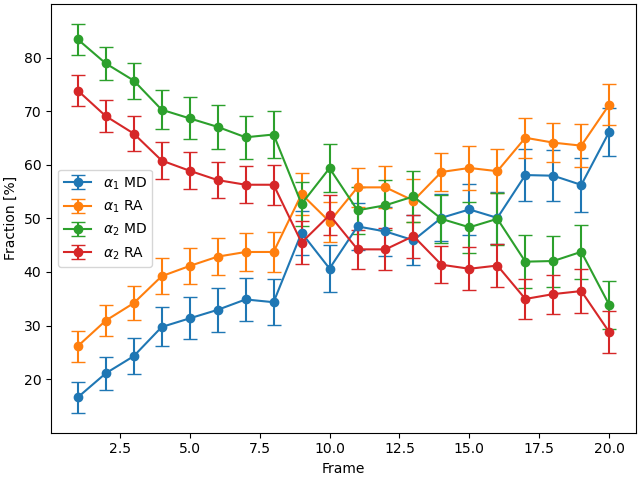

In [156]:
alphas_frames, errors_frames, kstests = plot_fraction_development(data_converted, monomer_data*conversion_factor, initial_frame, iterations, lim=lim, lim_con=lim_con, sigma_factor=sigma_factor, fit_lognorm=fit_lognorm, savepath=savepath)

In [157]:
frac_dep = {}
i = 0
for i in range(iterations):
    frac_dep[f'Fractions MD Frame {initial_frame+i+1}'] = alphas_frames[0][i]
    frac_dep[f'Errors MD Frame {initial_frame+i+1}'] = errors_frames[0][i]
    frac_dep[f'KS-Test MD Frame {initial_frame+i+1}'] = np.pad(kstests[0][i], (0, lim_con-2))
    frac_dep[f'Fractions RA Frame {initial_frame+i+1}'] = alphas_frames[1][i]
    frac_dep[f'Errors RA Frame {initial_frame+i+1}'] = errors_frames[1][i]
    frac_dep[f'KS-Test RA Frame {initial_frame+i+1}'] = np.pad(kstests[1][i], (0, lim_con-2))
    i += 1
frac_dep = pd.DataFrame.from_dict(frac_dep)
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
frac_dep.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()

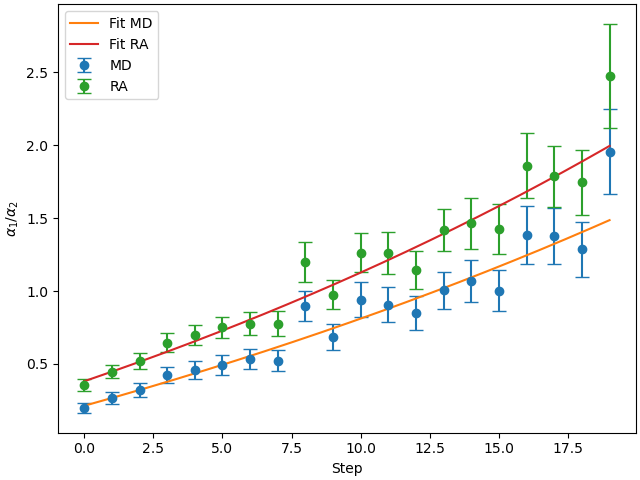

In [158]:
savepath = results_path.format(f'FracFit_Recovery_mono{monomer_id}_startframe{monomer_start_frame}_Ftaken{frames_taken}_roi{roi_identifier}_n{lim_con}.png')
params, errors_fit = fit_fraction(alphas_frames, errors_frames, 0, savepath=savepath)
fit_res = pd.DataFrame(data={'Parameters MD': params[0],'Error MD': errors_fit[0], 'Parameters RA': params[1],'Error RA': errors_fit[1]})
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
fit_res.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()

### **Analyzing ROI Dependence**

The following cells allow an investigation of how the determined oligomeric fractions depend on the ROI size used.

In [77]:
analysis_id = 'Recovery' # Choose 'Recovery' or 'Tracking' for TOCCSL or tracking measurements
######## choose which dataset the monomer signals should be taken from (identifier meanings see below)
monomer_id = 'dvTOC'
######## highest oligomeric state to consider
lim_con = 4
######## number of bootstrap iterations
n_bootstrap = 400
######## starting frame from which the monomer data should be taken from
monomer_start_frame = 40
######## how many frames of the single molecule data should be taken
frames_taken = 40
######## ROI used for sm measurements in micro meters. If None, always the analysis ROI is taken.
monomer_roi = 3.0

# Which ROIs are investigated. See which group each number corresponds to in below cell
chosen_roi_group = 10

In [78]:
if chosen_roi_group==1:
    roi_radii = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
elif chosen_roi_group==2:
    roi_radii = np.array([4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==3:
    roi_radii = np.array([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==4:
    roi_radii = np.array([3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0])
elif chosen_roi_group==5:
    roi_radii = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
elif chosen_roi_group==6:
    roi_radii = np.array([3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==7:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5])
elif chosen_roi_group==8:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==9:
    roi_radii = np.array([6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0])
elif chosen_roi_group==10:
    roi_radii = np.array([2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5])

In [79]:
if chosen_roi_group<10:
    chosen_roi_string = f'0{chosen_roi_group}'
else:
    chosen_roi_string = f'{chosen_roi_group}'

savepath = results_path.format(f'FracROIs_{chosen_roi_string}_{analysis_id}_mono{monomer_id}_monoROI{monomer_roi}_startframe{monomer_start_frame}_Ftaken{frames_taken}_n{lim_con}.png')

if analysis_id == 'Recovery':
    folder_analysis = toccsl_folder
    analysis_frame = rec_frame
elif analysis_id == 'Tracking':
    folder_analysis = sm_folder
    analysis_frame = 0
else:
    raise Exception("analysis_id has to equal either Recovery or Tracking")

monomer_folder = get_monomer_folder(monomer_id)

Optimization MD: Success after 0.09425044059753418 s
Bootstrapping MD took 19.58341407775879 s
Optimization RA: Success after 0.09406876564025879 s
Bootstrapping RA took 21.561118602752686 s
Completed all after 53.54804062843323 s

Optimization MD: Success after 0.10978245735168457 s
Bootstrapping MD took 26.167932748794556 s
Optimization RA: Success after 0.13382935523986816 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping RA took 35.639437675476074 s
Completed all after 73.87076783180237 s

Optimization MD: Success after 0.10405492782592773 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 25.969182014465332 s
Optimization RA: Success after 0.13750767707824707 s
Bootstrapping RA took 33.211260080337524 s
Completed all after 72.0921573638916 s

Optimization MD: Success after 0.10250329971313477 s
Bootstrapping MD took 24.8350887298584 s
Optimization RA: Success after 0.12412643432617188 s
Bootstrapping RA took 31.16992211341858 s
Completed all after 68.63991117477417 s

Optimization MD: Success after 0.14385724067687988 s
Bootstrapping MD took 30.148301362991333 s
Optimization RA: Success after 0.0941624641418457 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping RA took 36.031909227371216 s
Completed all after 78.69741034507751 s

Optimization MD: Success after 0.09420275688171387 s
Bootstrapping MD took 31.24351692199707 s
Optimization RA: Success after 0.10939264297485352 s
Bootstrapping RA took 35.29916214942932 s
Completed all after 78.71717381477356 s

Optimization MD: Success after 0.11250734329223633 s
Bootstrapping MD took 30.785967588424683 s
Optimization RA: Success after 0.14130187034606934 s
Bootstrapping RA took 38.22506785392761 s
Completed all after 81.03853917121887 s

Optimization MD: Success after 0.10977911949157715 s
Bootstrapping MD took 30.525377988815308 s
Optimization RA: Success after 0.10984253883361816 s
Bootstrapping RA took 35.82230615615845 s
Completed all after 78.35176658630371 s

Optimization MD: Success after 0.09415912628173828 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 33.81957030296326 s
Optimization RA: Success after 0.12581753730773926 s
Bootstrapping RA took 45.225961685180664 s
Completed all after 91.08188343048096 s

Optimization MD: Success after 0.10216546058654785 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 36.23178148269653 s
Optimization RA: Success after 0.15713119506835938 s
Bootstrapping RA took 46.13399934768677 s
Completed all after 94.49853563308716 s

Optimization MD: Success after 0.1410846710205078 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 40.849785804748535 s
Optimization RA: Success after 0.14148592948913574 s
Bootstrapping RA took 47.38498282432556 s
Completed all after 100.26579236984253 s

Optimization MD: Success after 0.141221284866333 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 40.7567982673645 s
Optimization RA: Success after 0.13796520233154297 s
Bootstrapping RA took 48.214972496032715 s
Completed all after 101.04489636421204 s

Optimization MD: Success after 0.14130282402038574 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 41.36983609199524 s
Optimization RA: Success after 0.1567213535308838 s
Bootstrapping RA took 48.38896560668945 s
Completed all after 101.80824065208435 s

Optimization MD: Success after 0.14107251167297363 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 41.463112592697144 s
Optimization RA: Success after 0.14359045028686523 s
Bootstrapping RA took 48.02431082725525 s
Completed all after 101.55872797966003 s

Optimization MD: Success after 0.17287158966064453 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 46.82740926742554 s
Optimization RA: Success after 0.14209723472595215 s
Bootstrapping RA took 48.53354048728943 s
Completed all after 107.47144722938538 s

Optimization MD: Success after 0.15449929237365723 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 48.47976851463318 s
Optimization RA: Success after 0.14102888107299805 s
Bootstrapping RA took 48.165098428726196 s
Completed all after 108.76306748390198 s

Optimization MD: Success after 0.1565837860107422 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 48.99552655220032 s
Optimization RA: Success after 0.15766692161560059 s
Bootstrapping RA took 49.00446844100952 s
Completed all after 110.11580085754395 s

Optimization MD: Success after 0.1415400505065918 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 49.16136026382446 s
Optimization RA: Success after 0.14154386520385742 s
Bootstrapping RA took 49.21448755264282 s
Completed all after 110.47703886032104 s

Optimization MD: Success after 0.1416339874267578 s


C:\Users\mrdxy\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Bootstrapping MD took 49.32451319694519 s
Optimization RA: Success after 0.14143776893615723 s
Bootstrapping RA took 48.9462947845459 s
Completed all after 110.39949226379395 s



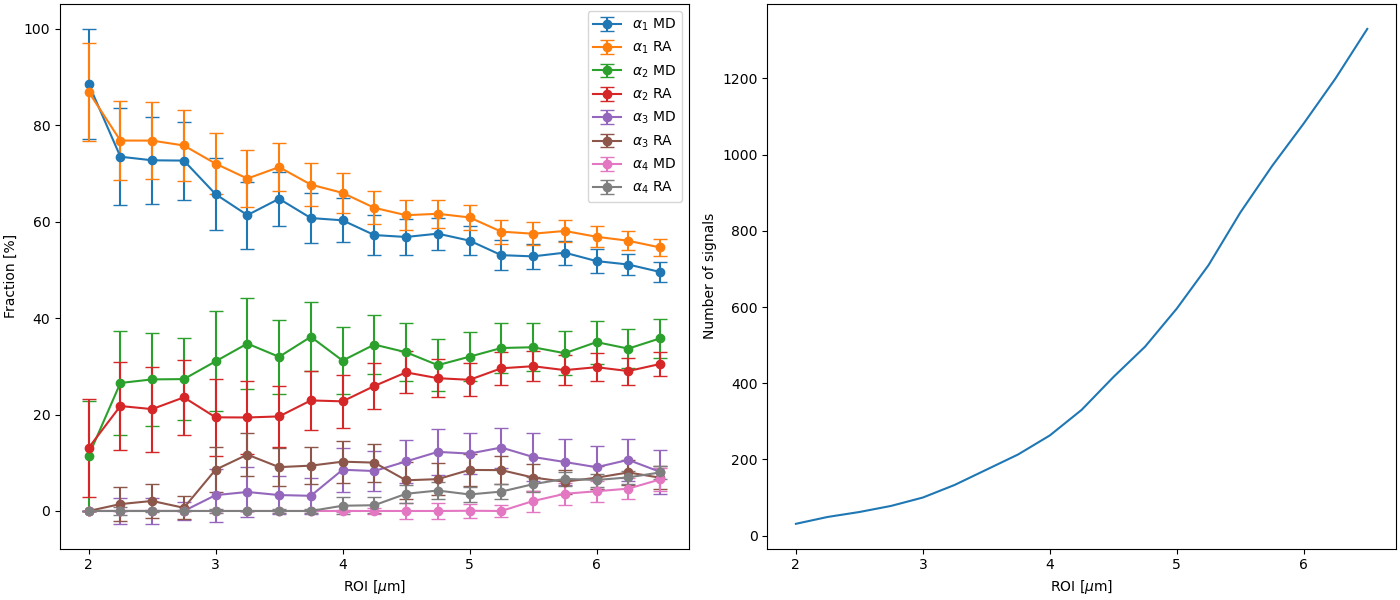

In [80]:
alphas_rois, errors_rois, kstests = fraction_rois_brightness(folder_analysis, monomer_folder, analysis_frame, roi_center, roi_radii, monomer_roi=monomer_roi, conversion_factor=conversion_factor, px_size=px_size, sigma_factor=sigma_factor, fit_lognorm=fit_lognorm, monomer_start_frame=monomer_start_frame, frames_taken=frames_taken, lim=lim, lim_con=lim_con, savepath=savepath)

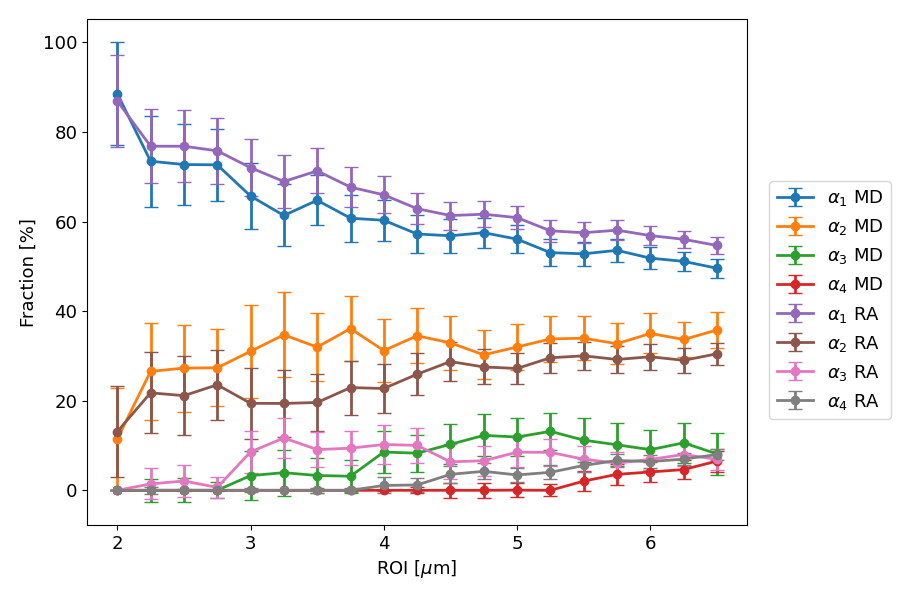

In [81]:
savepath2 = results_path.format(f'FracROIs2_{chosen_roi_string}_{analysis_id}_mono{monomer_id}_monoROI{monomer_roi}_startframe{monomer_start_frame}_Ftaken{frames_taken}_n{lim_con}.png')


labels = [[],[]]
i = 1
for alpha in alphas_rois[0]:
        labels[0].append(r'$\alpha_{}$ MD'.format(i))
        labels[1].append(r'$\alpha_{}$ RA'.format(i))
        i += 1
plot_fraction_rois(alphas_rois, errors_rois, labels, roi_radii, savepath=savepath2)

In [82]:
frac_dep = {}
i = 0
for roi_value in roi_radii:
    frac_dep[f'Fractions MD ROI {roi_value}'] = alphas_rois[0][i]
    frac_dep[f'Errors MD ROI {roi_value}'] = errors_rois[0][i]
    frac_dep[f'KS-Test MD ROI {roi_value}'] = np.pad(kstests[0][i], (0, lim_con-2))
    frac_dep[f'Fractions RA ROI {roi_value}'] = alphas_rois[1][i]
    frac_dep[f'Errors RA ROI {roi_value}'] = errors_rois[1][i]
    frac_dep[f'KS-Test RA ROI {roi_value}'] = np.pad(kstests[1][i], (0, lim_con-2))
    i += 1
frac_dep = pd.DataFrame.from_dict(frac_dep)
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
frac_dep.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()

### **Bleaching Analysis**

The following cells allow to perform a bleaching analysis. Later on other tools such as the development over frames, or the dependence on the ROI size, are provided.

In [56]:
########  the maximum displacement in pixels between two frames that will still be linked to a track
max_displacement = 4
######## the number of frames a particle is allowed to not be localized and still be linked to a single track
allowed_gap_size = 2
######## Choose 'Recovery' or 'Tracking' for TOCCSL or tracking measurements
analysis_id = 'Recovery'
######## ROI radius used for the analysis in micrometers
analysis_roi = 3.95
######## determines wether tracks of length 0 are disregarded in the fit
ignore0 = False
######## frame on which to perform the analysis on
first_frame = 5
######## highest oligomeric state to consider
lim_con = 4
######## number of bootstrap iterations
n_bootstrap = 400

In [57]:
if analysis_id == 'Recovery':
    analysis_folder = toccsl_folder
elif analysis_id == 'Tracking':
    analysis_folder = sm_folder
else:
    raise Exception("analysis_id has to equal either Recovery or Tracking")

In [58]:
# track data is gathered
trc_data = get_track_data(analysis_folder, first_frame, max_displacement=max_displacement, allowed_gap_size=allowed_gap_size, crop_roi=None)

files:   0%|          | 0/51 [00:00<?, ?it/s]

In [59]:
# important information is isolated from trc_data
track_lengths, probability_scaling, survival_probability = track_length_data(trc_data, analysis_roi, px_size, roi_center, normalized_profile, first_frame)

[0.16461089 1.44259183 0.08941034]


C:\Users\mrdxy\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


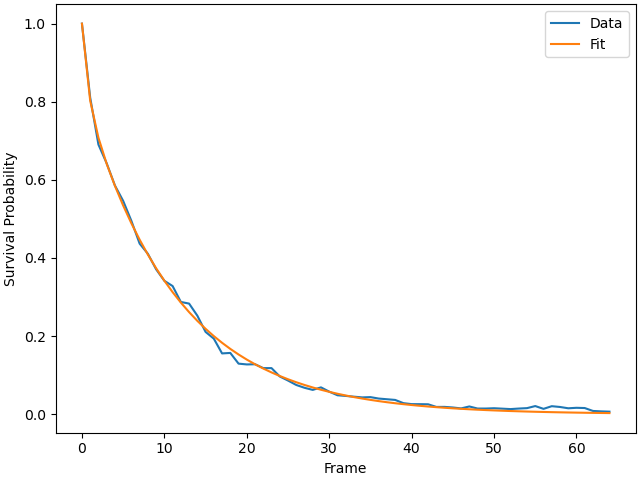

In [62]:
# diexponential fit is performed on the intensity curve to determine the monomer bleaching curve
excel_path = results_path.format(f'BleachingCurve{analysis_id}_analysisROI{analysis_roi}_frame{first_frame}_ignore0{ignore0}.xlsx')
savepath = excel_path[:-4] + 'png'
lam_fit, lam_fit_err = fit_survival_probability(survival_probability, ignore0=ignore0, plotfigure=True, savepath=savepath)
fit_res = pd.DataFrame(data={'(f, lam1, lam2)': lam_fit})
writer = pd.ExcelWriter(excel_path) 
fit_res.to_excel(writer, sheet_name='Bleaching Curve Fit Results')
writer.save()
writer.close()
print(lam_fit)

Optimization Success after 0.017396926879882812 s


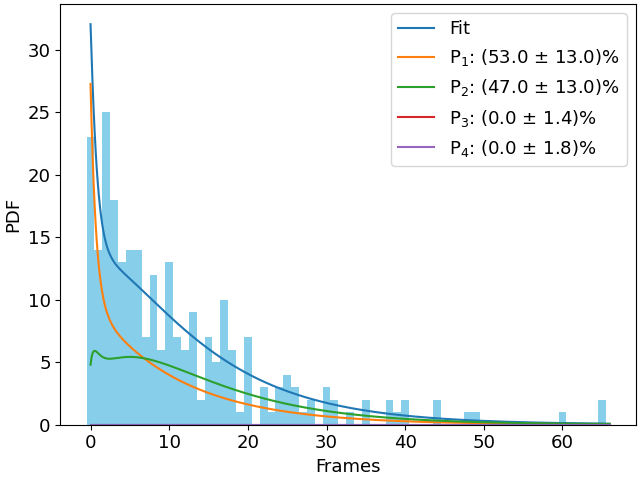

In [63]:
# bleaching based analysis is performed
excel_path = results_path.format(f'TrackLength{analysis_id}_analysisROI{analysis_roi}_frame{first_frame}_ignore0{ignore0}.xlsx')
savepath = excel_path[:-4] + 'png'
alphas, errors = get_alphas_bleaching(track_lengths, probability_scaling, lam_fit, lam_fit_err, lim_con=lim_con, n_bootstrap=n_bootstrap, ignore0=ignore0, savepath=savepath)

In [64]:
fit_res = pd.DataFrame(data={'Fit Results': alphas,'Fit Errors': errors})
writer = pd.ExcelWriter(excel_path) 
fit_res.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()
writer.close()

### **Development with Frames (Bleaching)**

The following cells allow to investigate the oligomeric fraction development with frames using the bleaching based analysis

In [59]:
########  the maximum displacement in pixels between two frames that will still be linked to a track
max_displacement = 4
######## the number of frames a particle is allowed to not be localized and still be linked to a single track
allowed_gap_size = 2
######## Choose 'Recovery' or 'Tracking' for TOCCSL or tracking measurements
analysis_id = 'Tracking' # Choose 'Recovery' or 'Tracking'
######## ROI radius used for the analysis in micrometers
analysis_roi = 5.0 # in micrometer
######## highest oligomeric state to consider
lim_con = 2
######## number of bootstrap iterations
n_bootstrap = 400

# Initial frame from which to investigate the development, first frame is frame 0
initial_frame = 0
# How many frames subsequent to the initial frame should be investigated
iterations = 20

In [298]:
if analysis_id == 'Recovery':
    analysis_folder = toccsl_folder
elif analysis_id == 'Tracking':
    analysis_folder = sm_folder
else:
    raise Exception("analysis_id has to equal either Recovery or Tracking")

files:   0%|          | 0/60 [00:00<?, ?it/s]

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.015626192092895508 s

Optimization Success after 0.0 s
Optimization Success after 0.01560831069946289 s

Optimization Success after 0.015625476837158203 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.015625953674316406 s

Optimization Success after 0.01562643051147461 s
Optimization Success after 0.015625953674316406 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.01582026481628418 s

Optimization Success after 0.015624284744262695 s


C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:686: RuntimeWarning: invalid value encountered in log
  temp_likelihood_estimator = lambda x: -1.0*np.sum(np.log(P(sample_tracks, sample_pscaling, lim_con, x)+1e-25))


Optimization Success after 0.015625715255737305 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s


C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:627: RuntimeWarning: overflow encountered in square
  result = (1.0-lam_fit_func(p_scaling*(n+1.0)))**order - (1.0-lam_fit_func(p_scaling*n))**order
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:627: RuntimeWarning: invalid value encountered in subtract
  result = (1.0-lam_fit_func(p_scaling*(n+1.0)))**order - (1.0-lam_fit_func(p_scaling*n))**order


Optimization Success after 0.015824556350708008 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s


C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:685: RuntimeWarning: overflow encountered in exp
  lam_fit_func = lambda x: temp_lam_fit[0]*np.exp(-temp_lam_fit[1]*x) + (1.0-temp_lam_fit[0])*np.exp(-temp_lam_fit[2]*x)
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:685: RuntimeWarning: invalid value encountered in add
  lam_fit_func = lambda x: temp_lam_fit[0]*np.exp(-temp_lam_fit[1]*x) + (1.0-temp_lam_fit[0])*np.exp(-temp_lam_fit[2]*x)
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:636: RuntimeWarning: invalid value encountered in add
  result += (1.0-np.sum(alphas))*P_oligomer(n, p_scaling, lim_con)
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:685: RuntimeWarning: overflow encountered in multiply
  lam_fit_func = lambda x: temp_lam_fit[0]*np.exp(-temp_lam_fit[1]*x) + (1.0-temp_lam_fit[0])*np.exp(-te

Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.009009599685668945 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s



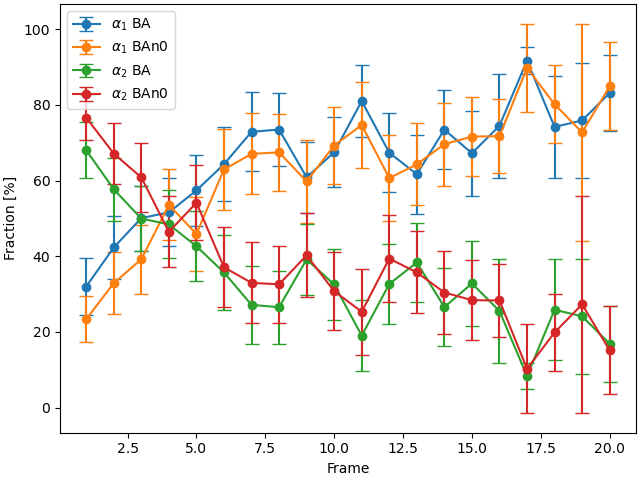

In [38]:
savepath = results_path.format(f'FracDevBBA_{analysis_id}_roi{analysis_roi}_n{lim_con}.png')

alphas_frames_bleaching, errors_frames_bleaching = plot_fraction_development_brightness(analysis_folder, normalized_profile, roi_center, analysis_roi, initial_frame, iterations, px_size=px_size, lim_con=lim_con, max_displacement=max_displacement, allowed_gap_size=allowed_gap_size, n_bootstrap=n_bootstrap, savepath=savepath)

In [39]:
frac_dep = {}
i = 0
for i in range(iterations):
    frac_dep[f'Fractions BBA Frame {initial_frame+i+1}'] = alphas_frames_bleaching[0][i]
    frac_dep[f'Errors BBA Frame {initial_frame+i+1}'] = errors_frames_bleaching[0][i]
    frac_dep[f'Fractions BBAn0 Frame {initial_frame+i+1}'] = alphas_frames_bleaching[1][i]
    frac_dep[f'Errors BBAn0 Frame {initial_frame+i+1}'] = errors_frames_bleaching[1][i]
    i += 1
frac_dep = pd.DataFrame.from_dict(frac_dep)
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
frac_dep.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()

### **Analyzing ROI Dependence (Bleaching)**

The following cells allow the investigation of the oligomeric fraction dependence on the size of the ROI when using the bleaching based analysis.

In [83]:
########  the maximum displacement in pixels between two frames that will still be linked to a track
max_displacement = 4
######## the number of frames a particle is allowed to not be localized and still be linked to a single track
allowed_gap_size = 2
######## Choose 'Recovery' or 'Tracking' for TOCCSL or tracking measurements
analysis_id = 'Recovery' # Choose 'Recovery' or 'Tracking'
######## highest oligomeric state to consider
lim_con = 2
######## number of bootstrap iterations
n_bootstrap = 400

# Which ROIs are investigated. See which group each number corresponds to in below cell
chosen_roi_group = 10

In [84]:
if chosen_roi_group==1:
    roi_radii = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
elif chosen_roi_group==2:
    roi_radii = np.array([4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==3:
    roi_radii = np.array([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==4:
    roi_radii = np.array([3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0])
elif chosen_roi_group==5:
    roi_radii = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
elif chosen_roi_group==6:
    roi_radii = np.array([3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==7:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5])
elif chosen_roi_group==8:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==9:
    roi_radii = np.array([6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0])
elif chosen_roi_group==10:
    roi_radii = np.array([2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5])

In [85]:
if chosen_roi_group<10:
    chosen_roi_string = f'0{chosen_roi_group}'
else:
    chosen_roi_string = f'{chosen_roi_group}'


savepath = results_path.format(f'FracROIsBBA_{chosen_roi_string}_{analysis_id}_n{lim_con}.png')

if analysis_id == 'Recovery':
    first_frame = rec_frame
    first_frame_intensityfit = rec_frame
    analysis_folder = toccsl_folder
elif analysis_id == 'Tracking':
    first_frame = 0
    first_frame_intensityfit = 0
    analysis_folder = sm_folder
else:
    raise Exception("analysis_id has to equal either Recovery or Tracking")

files:   0%|          | 0/51 [00:00<?, ?it/s]

Optimization Success after 0.0 s


C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:670: RuntimeWarning: invalid value encountered in log
  temp_likelihood_estimator = lambda x: -1.0*np.sum(np.log(P(sample_tracks, sample_pscaling, lim_con, x)+1e-25))


Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s


C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:669: RuntimeWarning: overflow encountered in exp
  lam_fit_func = lambda x: temp_lam_fit[0]*np.exp(-temp_lam_fit[1]*x) + (1.0-temp_lam_fit[0])*np.exp(-temp_lam_fit[2]*x)
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:611: RuntimeWarning: invalid value encountered in subtract
  result = (1.0-lam_fit_func(p_scaling*(n+1.0)))**order - (1.0-lam_fit_func(p_scaling*n))**order
C:\Users\mrdxy\Documents\Analysis_Master_Thesis\Max_Scripts\Max_TOCCSL\Max_toccsl_analysis.py:620: RuntimeWarning: invalid value encountered in add
  result += (1.0-np.sum(alphas))*P_oligomer(n, p_scaling, lim_con)


Optimization Success after 0.0 s

Optimization Success after 0.008505582809448242 s
Optimization Success after 0.01604437828063965 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.015436887741088867 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.015630722045898438 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0.0 s
Optimization Success after 0.0 s

Optimization Success after 0

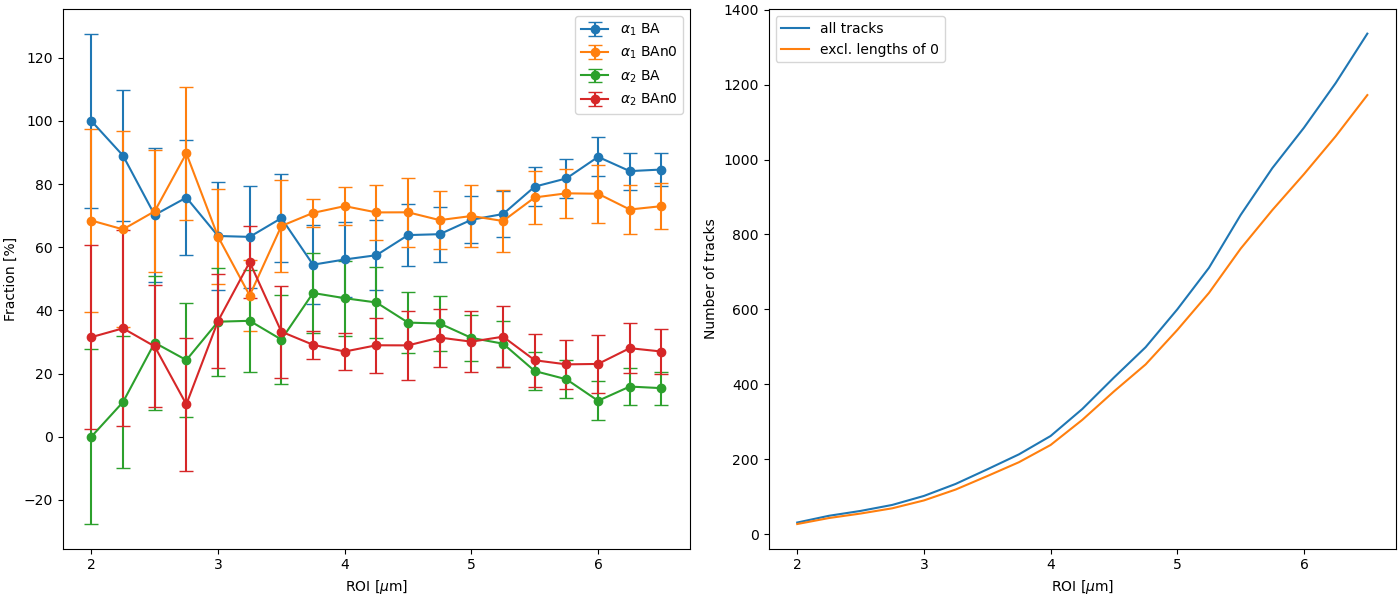

In [86]:
alphas_rois_bleaching, errors_rois_bleaching = fraction_rois_bleaching(analysis_folder, first_frame, normalized_profile, roi_center, roi_radii, px_size=px_size, lim_con=lim_con, n_bootstrap=n_bootstrap, max_displacement=max_displacement, allowed_gap_size=allowed_gap_size, first_frame_intensityfit=first_frame_intensityfit, savepath=savepath)

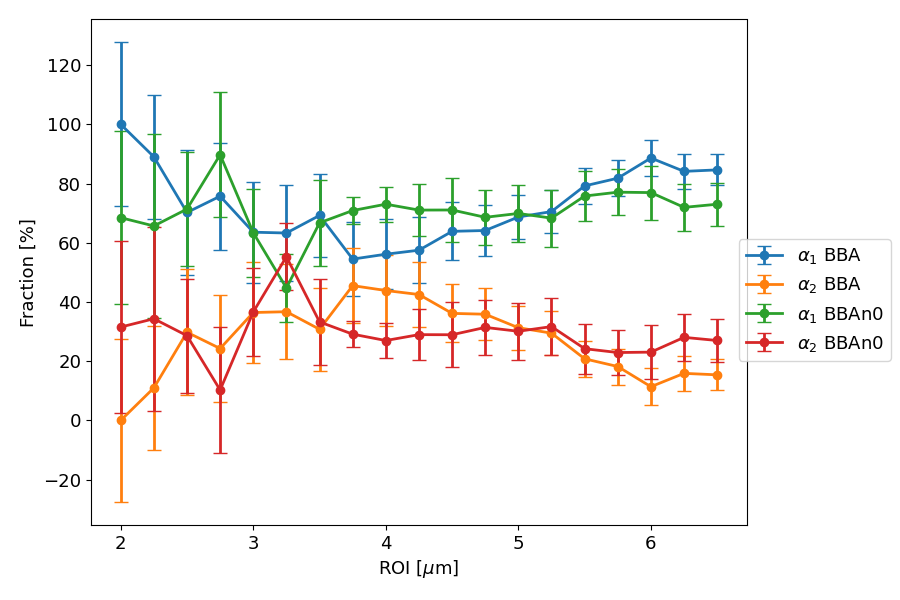

In [87]:
savepath2 = results_path.format(f'FracROIs2BBA_{chosen_roi_string}_{analysis_id}_n{lim_con}.png')

labels = [[],[]]
i = 1
for alpha in alphas_rois_bleaching[0]:
        labels[0].append(r'$\alpha_{}$ BBA'.format(i))
        labels[1].append(r'$\alpha_{}$ BBAn0'.format(i))
        i += 1
plot_fraction_rois(alphas_rois_bleaching, errors_rois_bleaching, labels, roi_radii, savepath=savepath2)

In [88]:
frac_dep = {}
i = 0
for roi_value in roi_radii:
    frac_dep[f'Fractions BBA ROI {roi_value}'] = alphas_rois_bleaching[0][i]
    frac_dep[f'Errors BBA ROI {roi_value}'] = errors_rois_bleaching[0][i]
    frac_dep[f'Fractions BBAn0 ROI {roi_value}'] = alphas_rois_bleaching[1][i]
    frac_dep[f'Errors BBAn0 ROI {roi_value}'] = errors_rois_bleaching[1][i]
    i += 1
frac_dep = pd.DataFrame.from_dict(frac_dep)
excel_path = savepath[:-3] + 'xlsx'
writer = pd.ExcelWriter(excel_path) 
frac_dep.to_excel(writer, sheet_name='Fraction Fit Results')
writer.save()

### **Compare Brightness and Bleaching Analysis**

The following cells allow to neatly plot together the results obtained from the brightness and bleaching analysis. One should take care to correctly set the parameters as they were used earlier, the parameters set here are only used for the labeling of the axes.

In [163]:
initial_frame = 0
iterations = 20
frames = np.arange(initial_frame+1, iterations+1)

In [164]:
alphas_temp = [alphas_frames[0], alphas_frames[1], alphas_frames_bleaching[0], alphas_frames_bleaching[1]]
errors_temp = [errors_frames[0], errors_frames[1], errors_frames_bleaching[0], errors_frames_bleaching[1]]

In [165]:
labels = [[],[],[],[]]
i = 1
for alpha in alphas_frames[0]:
        labels[0].append(r'$\alpha_{}$ MD'.format(i))
        labels[1].append(r'$\alpha_{}$ RA'.format(i))
        labels[2].append(r'$\alpha_{}$ BBA'.format(i))
        labels[3].append(r'$\alpha_{}$ BBAn0'.format(i))
        i += 1

In [166]:
alphas_temp = [alphas_frames[0], alphas_frames[1], alphas_frames_bleaching[1]]
errors_temp = [errors_frames[0], errors_frames[1], errors_frames_bleaching[1]]

labels = [[],[],[]]
i = 1
for alpha in alphas_frames[0]:
        labels[0].append(r'$\alpha_{}$ MD'.format(i))
        labels[1].append(r'$\alpha_{}$ RA'.format(i))
        #labels[2].append(r'$\alpha_{}$ BBA'.format(i))
        labels[2].append(r'$\alpha_{}$ BBAn0'.format(i))
        i += 1

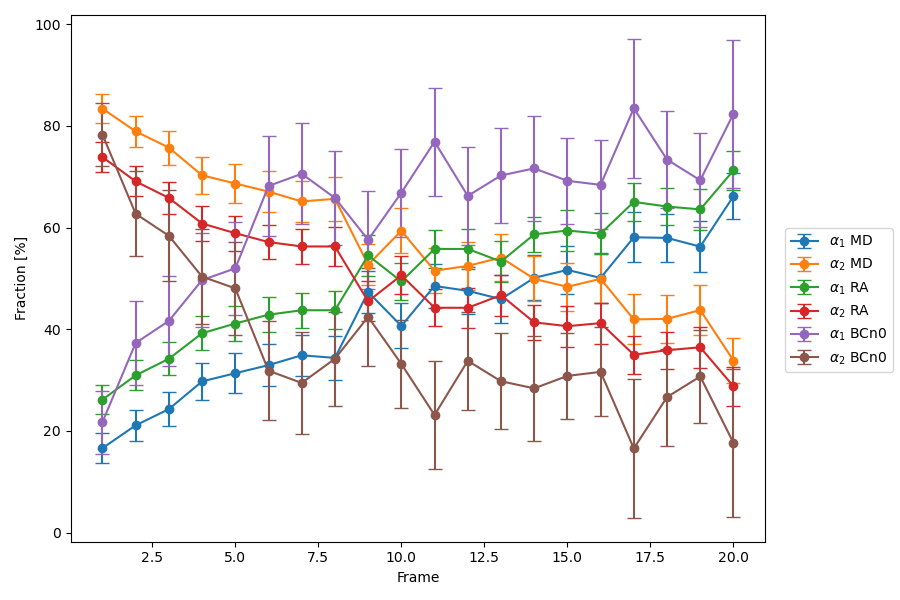

In [169]:
savepath = results_path.format('Frames_Comparison_Recovery_roi5.5_frame0it20_n2_n0.png')
plot_fraction_frames(alphas_temp, errors_temp, labels, frames, savepath=savepath)

In [89]:
chosen_roi_group = 10

if chosen_roi_group==1:
    roi_radii = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
elif chosen_roi_group==2:
    roi_radii = np.array([4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==3:
    roi_radii = np.array([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==4:
    roi_radii = np.array([3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0])
elif chosen_roi_group==5:
    roi_radii = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
elif chosen_roi_group==6:
    roi_radii = np.array([3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==7:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5])
elif chosen_roi_group==8:
    roi_radii = np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5])
elif chosen_roi_group==9:
    roi_radii = np.array([6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0])
elif chosen_roi_group==10:
    roi_radii = np.array([2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5])

In [90]:
alphas_temp = [alphas_rois[0], alphas_rois[1], alphas_rois_bleaching[0], alphas_rois_bleaching[1]]
errors_temp = [errors_rois[0], errors_rois[1], errors_rois_bleaching[0], errors_rois_bleaching[1]]

In [91]:
labels = [[],[],[],[]]
i = 1
for alpha in alphas_rois[0]:
        labels[0].append(r'$\alpha_{}$ MD'.format(i))
        labels[1].append(r'$\alpha_{}$ RA'.format(i))
        labels[2].append(r'$\alpha_{}$ BBA'.format(i))
        labels[3].append(r'$\alpha_{}$ BBAn0'.format(i))
        i += 1

In [92]:

alphas_temp = [alphas_rois[0], alphas_rois[1],  alphas_rois_bleaching[0]]
errors_temp = [errors_rois[0], errors_rois[1],  errors_rois_bleaching[0]]

labels = [[],[],[],[]]
i = 1
for alpha in alphas_rois[0]:
        labels[0].append(r'$\alpha_{}$ MD'.format(i))
        labels[1].append(r'$\alpha_{}$ RA'.format(i))
        labels[2].append(r'$\alpha_{}$ BBA'.format(i))
        #labels[2].append(r'$\alpha_{}$ BBAn0'.format(i))
        i += 1

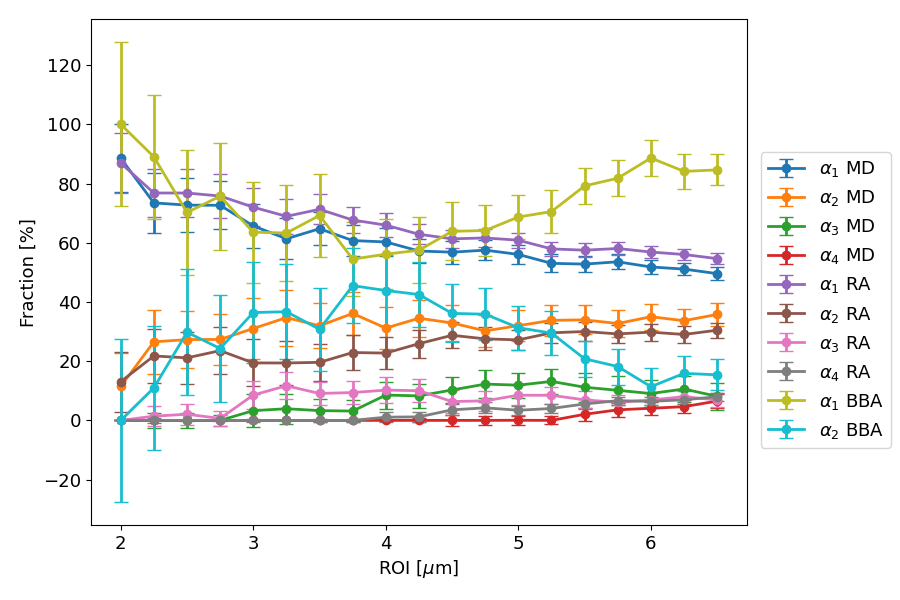

In [93]:
savepath = results_path.format('Rois_Comparison_Recovery_group10')
plot_fraction_rois(alphas_temp, errors_temp, labels, roi_radii, savepath=savepath)